# Machine Learning Lab

This lab is aimed to walk you through the complete workflow of a machine learning project; from data wrangling, exploratory data analysis (EDA), model training and model evaluation/comparison. 

You will work with your machine project teamates for this lab and your team needs to decide whether to use either R or Python as the main programming language. **Each team memeber needs to work on his/her own submission.**

We will use Github for team collaboration. There is a [TL;DR](https://gist.github.com/Chaser324/ce0505fbed06b947d962) of how do programmers work together on Github or we can break it down into following steps:

1. The team leader creates a public Github repository under his/her account first.

2. All the other team members fork the repo so you will have a COPY of the repo under your account

3. Git clone YOUR OWN repo otherwise you won't be able to push later.

4. Create a subfolder under your name and finish your code. Push the changes to Github.

5. Go to the Github page of YOUR OWN repository and click the "Pull Request" tab. You can find the details [here](https://help.github.com/articles/creating-a-pull-request-from-a-fork/)

6. Submit the pull request so you can see it under team leader's repository.

7. Pair review each other's code before merging it to the master branch.


**Homework**
To understand fork, pull request and branch better, review [this video](https://youtu.be/_NrSWLQsDL4) in 1.25X speed.


## Part I: Preprocessing and EDA

- The data comes from a global e-retailer company, including orders from 2012 to 2015. Import the **Orders** dataset and do some basic EDA. 
- For problem 1 to 3, we mainly focus on data cleaning and data visualizations. You can use all the packages that you are familiar with to conduct some plots and also provide **brief interpretations** about your findings.

### Problem 1: Dataset Import & Cleaning
Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type. 


### Problem 2: Inventory Management
- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
- He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

- ***Hint:*** For each order, it has an attribute called `Quantity` that indicates the number of product in the order. If an order contains more than one product, there will be multiple observations of the same order.


### Problem 3: Why did customers make returns?
- Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.

In [1]:
import pandas as pd
import re
import math

pd.set_option("max_columns",100)

Orders = pd.read_csv('data/Orders.csv')
Orders['Profit'] = list(map(lambda x: float(re.sub('[$,\,]','',x)), Orders['Profit'].tolist()))
Orders['Sales'] = list(map(lambda x: float(re.sub('[$,\,]','',x)), Orders['Sales'].tolist()))
Orders['Roundup.Discount'] = list(map(lambda x: math.ceil(x * 10)/10, Orders['Discount']))

from datetime import datetime
Orders['Order.Year'] = list(map(lambda x: datetime.strptime(x, '%m/%d/%y').year, Orders['Order.Date'].tolist()))
Orders['Order.Month'] = list(map(lambda x: datetime.strptime(x, '%m/%d/%y').month, Orders['Order.Date'].tolist()))
Orders['Order.Day'] = list(map(lambda x: datetime.strptime(x, '%m/%d/%y').day, Orders['Order.Date'].tolist()))

#Data exploring by viewing head of the table
Orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Roundup.Discount,Order.Year,Order.Month,Order.Day
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,0.0,2014,11,11
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,0.1,2014,2,5
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,0.1,2014,10,17
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,0.1,2014,1,28
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,0.0,2014,11,5


In [2]:
#Data exploring by unique values1
import numpy as np
for i in list(Orders):
    if len(np.unique(Orders[i])) <= 100:  #Comment : I can handle these unique values quantitively.
        print(i)
        print(np.unique(Orders[i])) 

Ship.Mode
['First Class' 'Same Day' 'Second Class' 'Standard Class']
Segment
['Consumer' 'Corporate' 'Home Office']
Region
['Canada' 'Caribbean' 'Central Africa' 'Central America' 'Central Asia'
 'Central US' 'Eastern Africa' 'Eastern Asia' 'Eastern Europe'
 'Eastern US' 'North Africa' 'Northern Europe' 'Oceania' 'South America'
 'Southeastern Asia' 'Southern Africa' 'Southern Asia' 'Southern Europe'
 'Southern US' 'Western Africa' 'Western Asia' 'Western Europe'
 'Western US']
Market
['Africa' 'Asia Pacific' 'Europe' 'LATAM' 'USCA']
Category
['Furniture' 'Office Supplies' 'Technology']
Sub.Category
['Accessories' 'Appliances' 'Art' 'Binders' 'Bookcases' 'Chairs' 'Copiers'
 'Envelopes' 'Fasteners' 'Furnishings' 'Labels' 'Machines' 'Paper'
 'Phones' 'Storage' 'Supplies' 'Tables']
Quantity
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Discount
[0.    0.002 0.07  0.1   0.15  0.17  0.2   0.202 0.25  0.27  0.3   0.32
 0.35  0.37  0.4   0.402 0.45  0.47  0.5   0.55  0.57  0.6   0.602 0.65
 0.7

In [3]:
#Data exploring by unique values2
import numpy as np
for i in list(Orders):
    if len(np.unique(Orders[i])) > 100:  #Comment : It seems to be difficult to handle as unique values.
        print(i)
        print('- Sample value : ' + str(np.unique(Orders[i])[0]) )

Row.ID
- Sample value : 1
Order.ID
- Sample value : AE-2012-PO8865138-41184
Order.Date
- Sample value : 1/1/12
Ship.Date
- Sample value : 1/1/13
Customer.ID
- Sample value : AA-10315102
Customer.Name
- Sample value : Aaron Bergman
Postal.Code
- Sample value : 1040.0
City
- Sample value : Aachen
State
- Sample value : 'Ajman
Country
- Sample value : Afghanistan
Product.ID
- Sample value : FUR-BO-3174
Product.Name
- Sample value : "While you Were Out" Message Book, One Form per Page
Sales
- Sample value : 0.44
Profit
- Sample value : -6599.98
Shipping.Cost
- Sample value : 1.002


In [4]:
#Data overall by Category - Quantity
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20, 5))
Orders.groupby(['Category','Order.Month'])['Quantity'].sum().unstack().plot.bar(ax=ax)
#Comment : In only Quantity, Office Supplies are the largest.

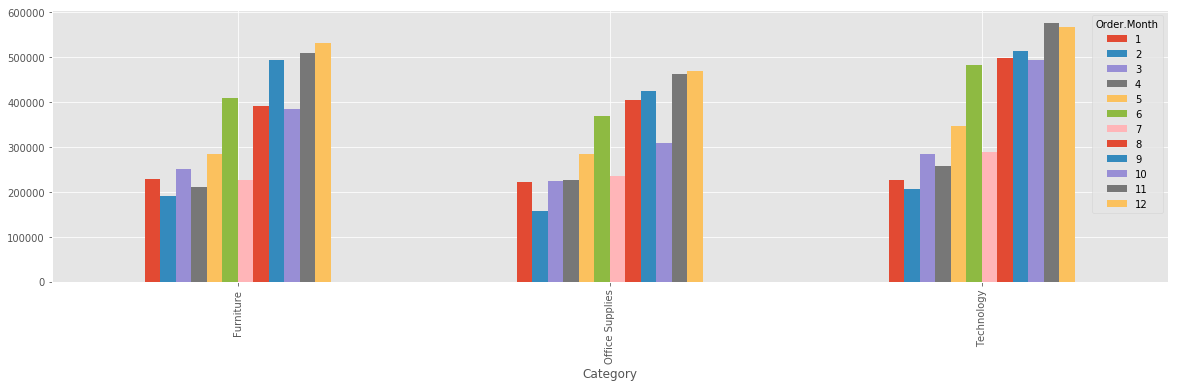

In [5]:
#Data overall by Category - Sales
fig, ax = plt.subplots(figsize=(20, 5))
Orders.groupby(['Category','Order.Month'])['Sales'].sum().unstack().plot.bar(ax=ax)
#Comment : Technology items are so profitable than I expected.

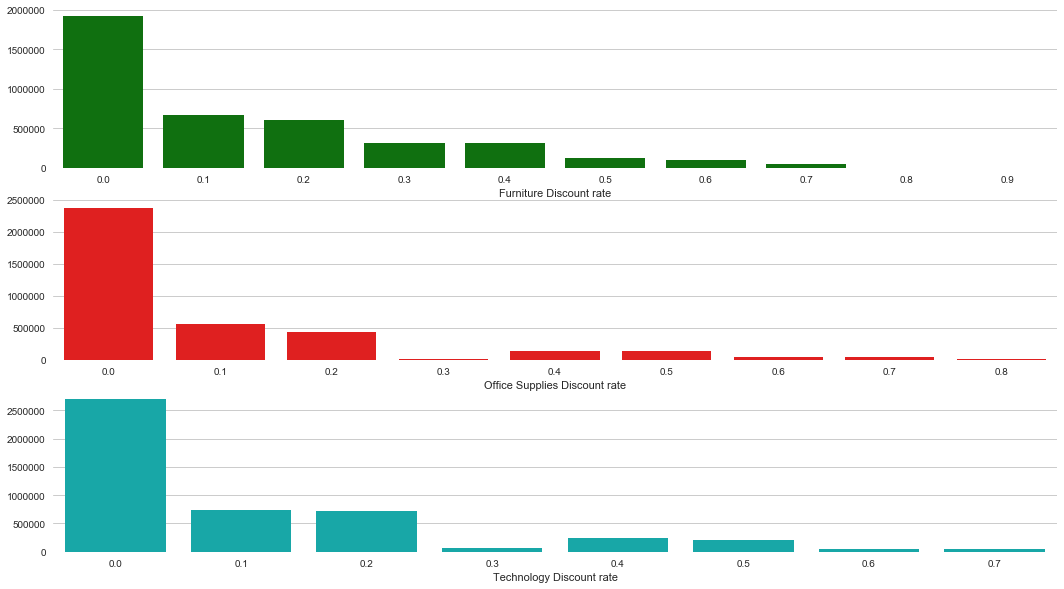

In [6]:
#Data overall by Discount Effect
import seaborn as sns
import matplotlib.pyplot as plt

Furniture_discount_plot = Orders[Orders['Category'] == 'Furniture'][['Sales', 'Roundup.Discount']].groupby('Roundup.Discount').sum().reset_index()
Office_Supplies_discount_plot = Orders[Orders['Category'] == 'Office Supplies'][['Sales', 'Roundup.Discount']].groupby('Roundup.Discount').sum().reset_index()
Technology_discount_plot = Orders[Orders['Category'] == 'Technology'][['Sales', 'Roundup.Discount']].groupby('Roundup.Discount').sum().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(18,10))

plt.subplot(311)
ax1 = sns.barplot(x="Roundup.Discount", y="Sales", data=Furniture_discount_plot, label="Sales", color='g')
ax1.set(ylabel="", xlabel="Furniture Discount rate")
sns.despine(left=True, bottom=True)

plt.subplot(312)
ax1 = sns.barplot(x="Roundup.Discount", y="Sales", data=Office_Supplies_discount_plot, label="Sales", color='r')
ax1.set(ylabel="", xlabel="Office Supplies Discount rate")
sns.despine(left=True, bottom=True)

plt.subplot(313)
ax1 = sns.barplot(x="Roundup.Discount", y="Sales", data=Technology_discount_plot, label="Sales", color='c')
ax1.set(ylabel="", xlabel="Technology Discount rate")
sns.despine(left=True, bottom=True)

#Comment : There is no relevant between sales and discount rates.

Month : 1


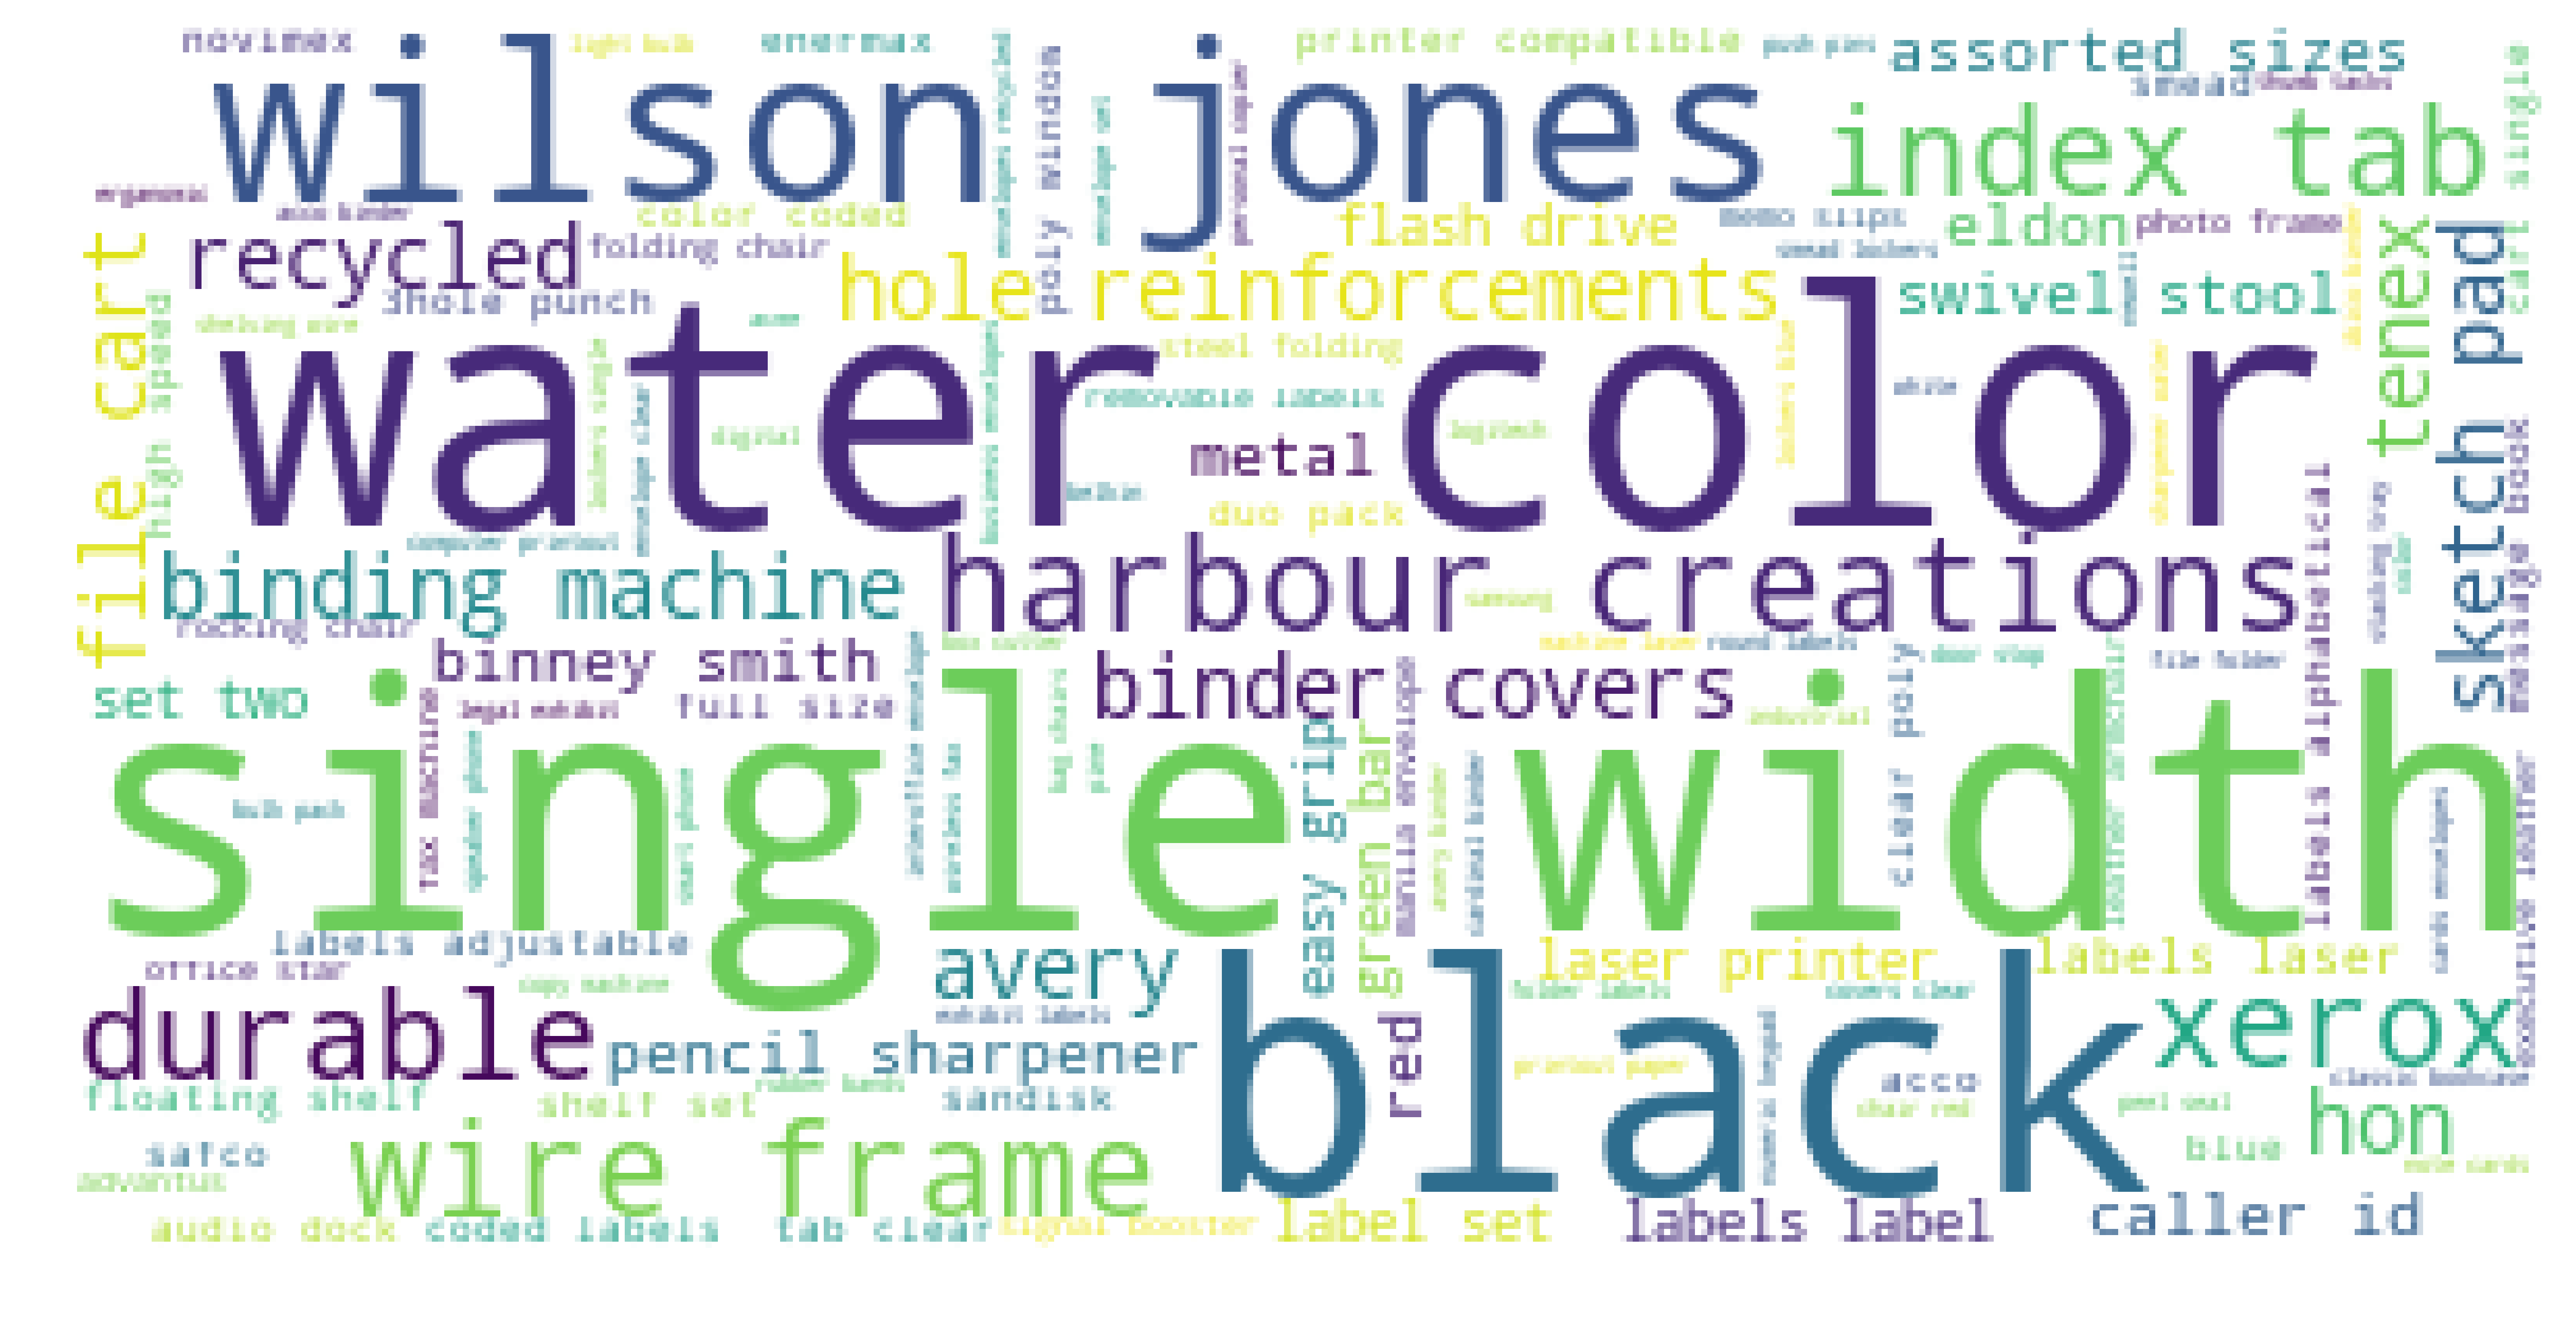

Month : 2


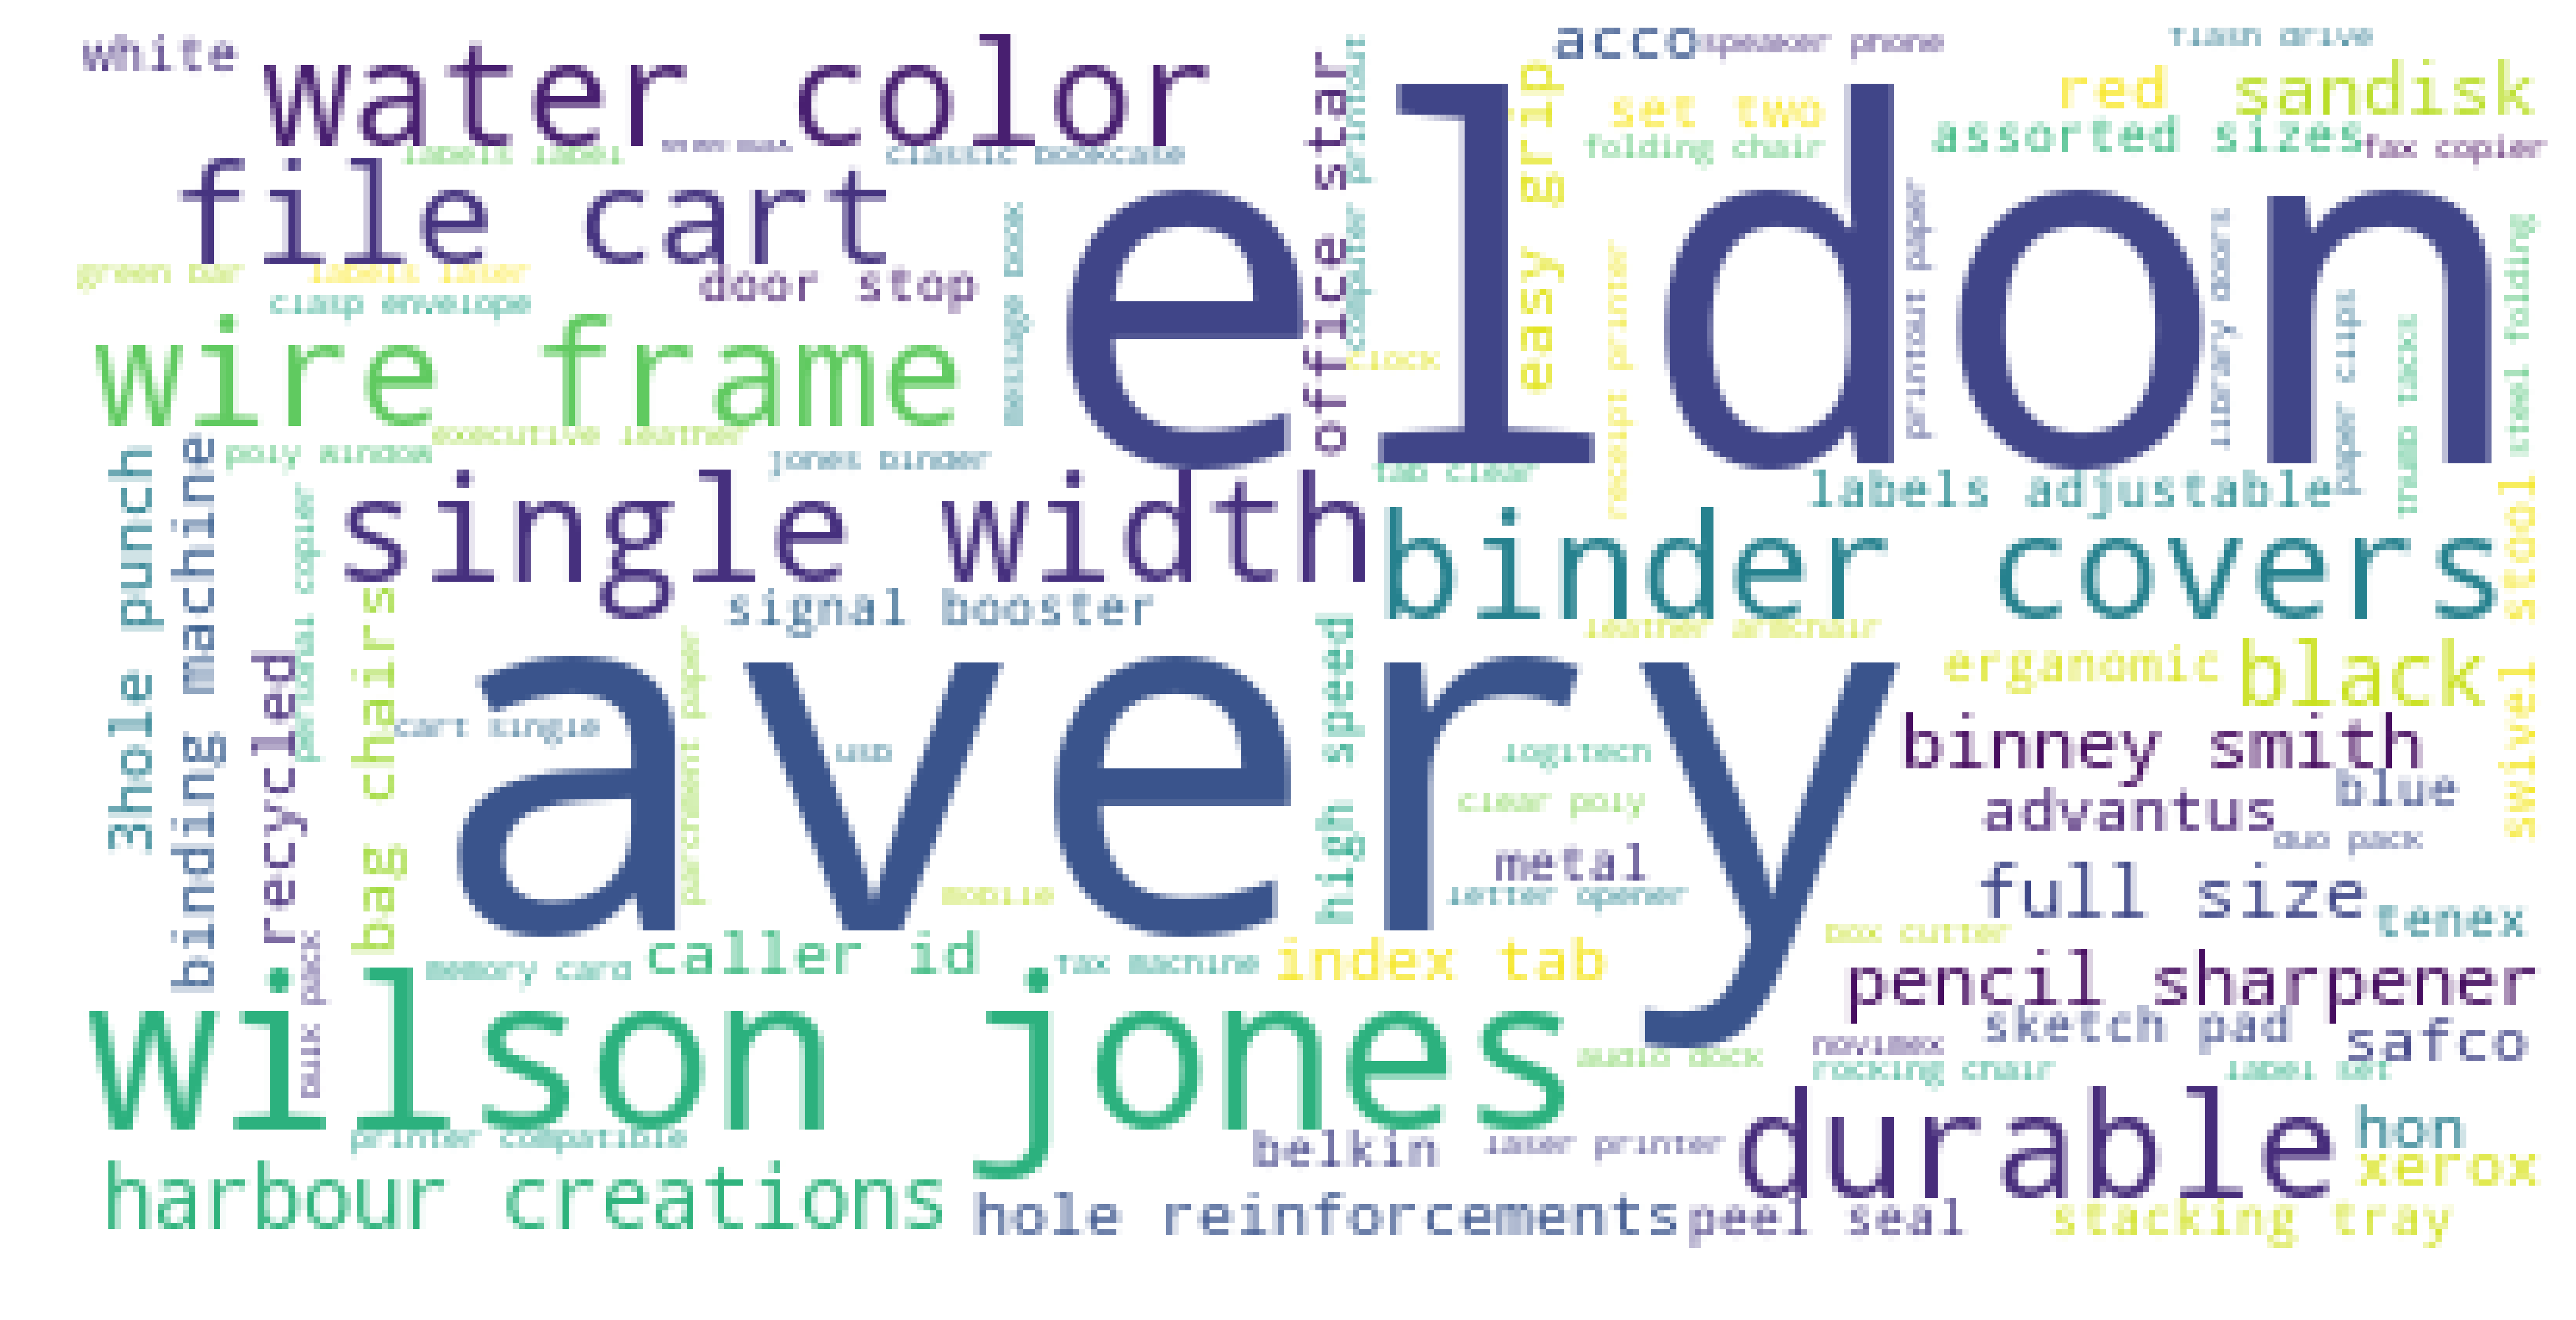

Month : 3


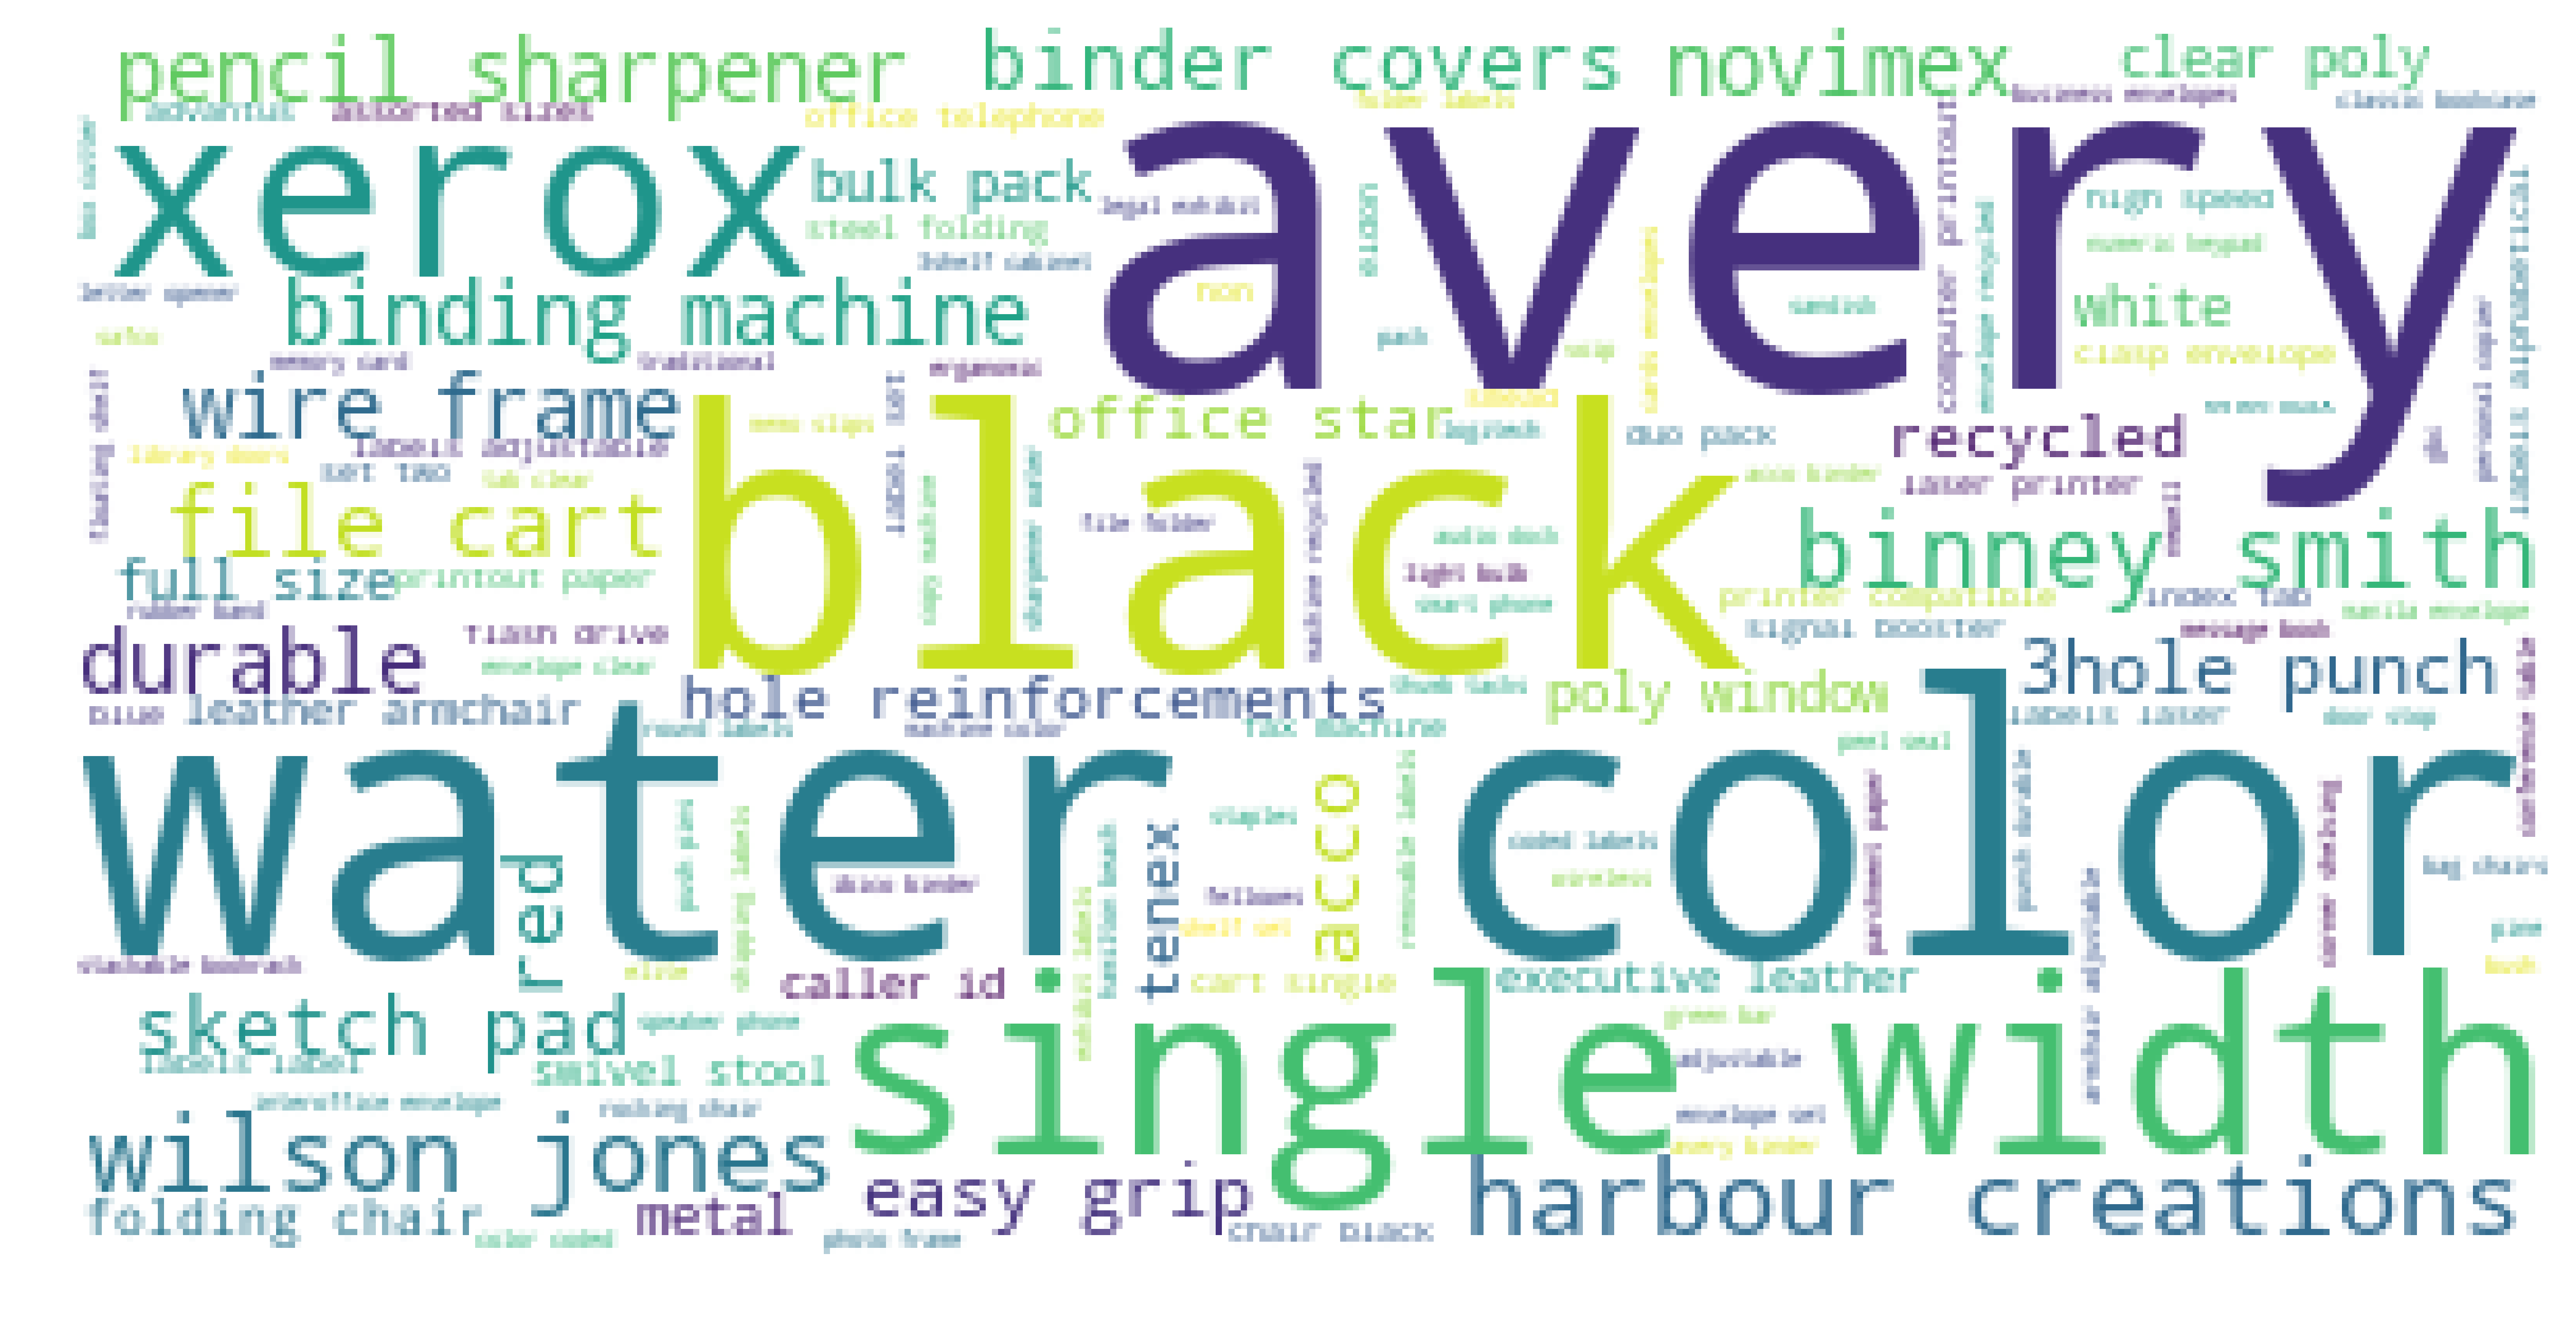

Month : 4


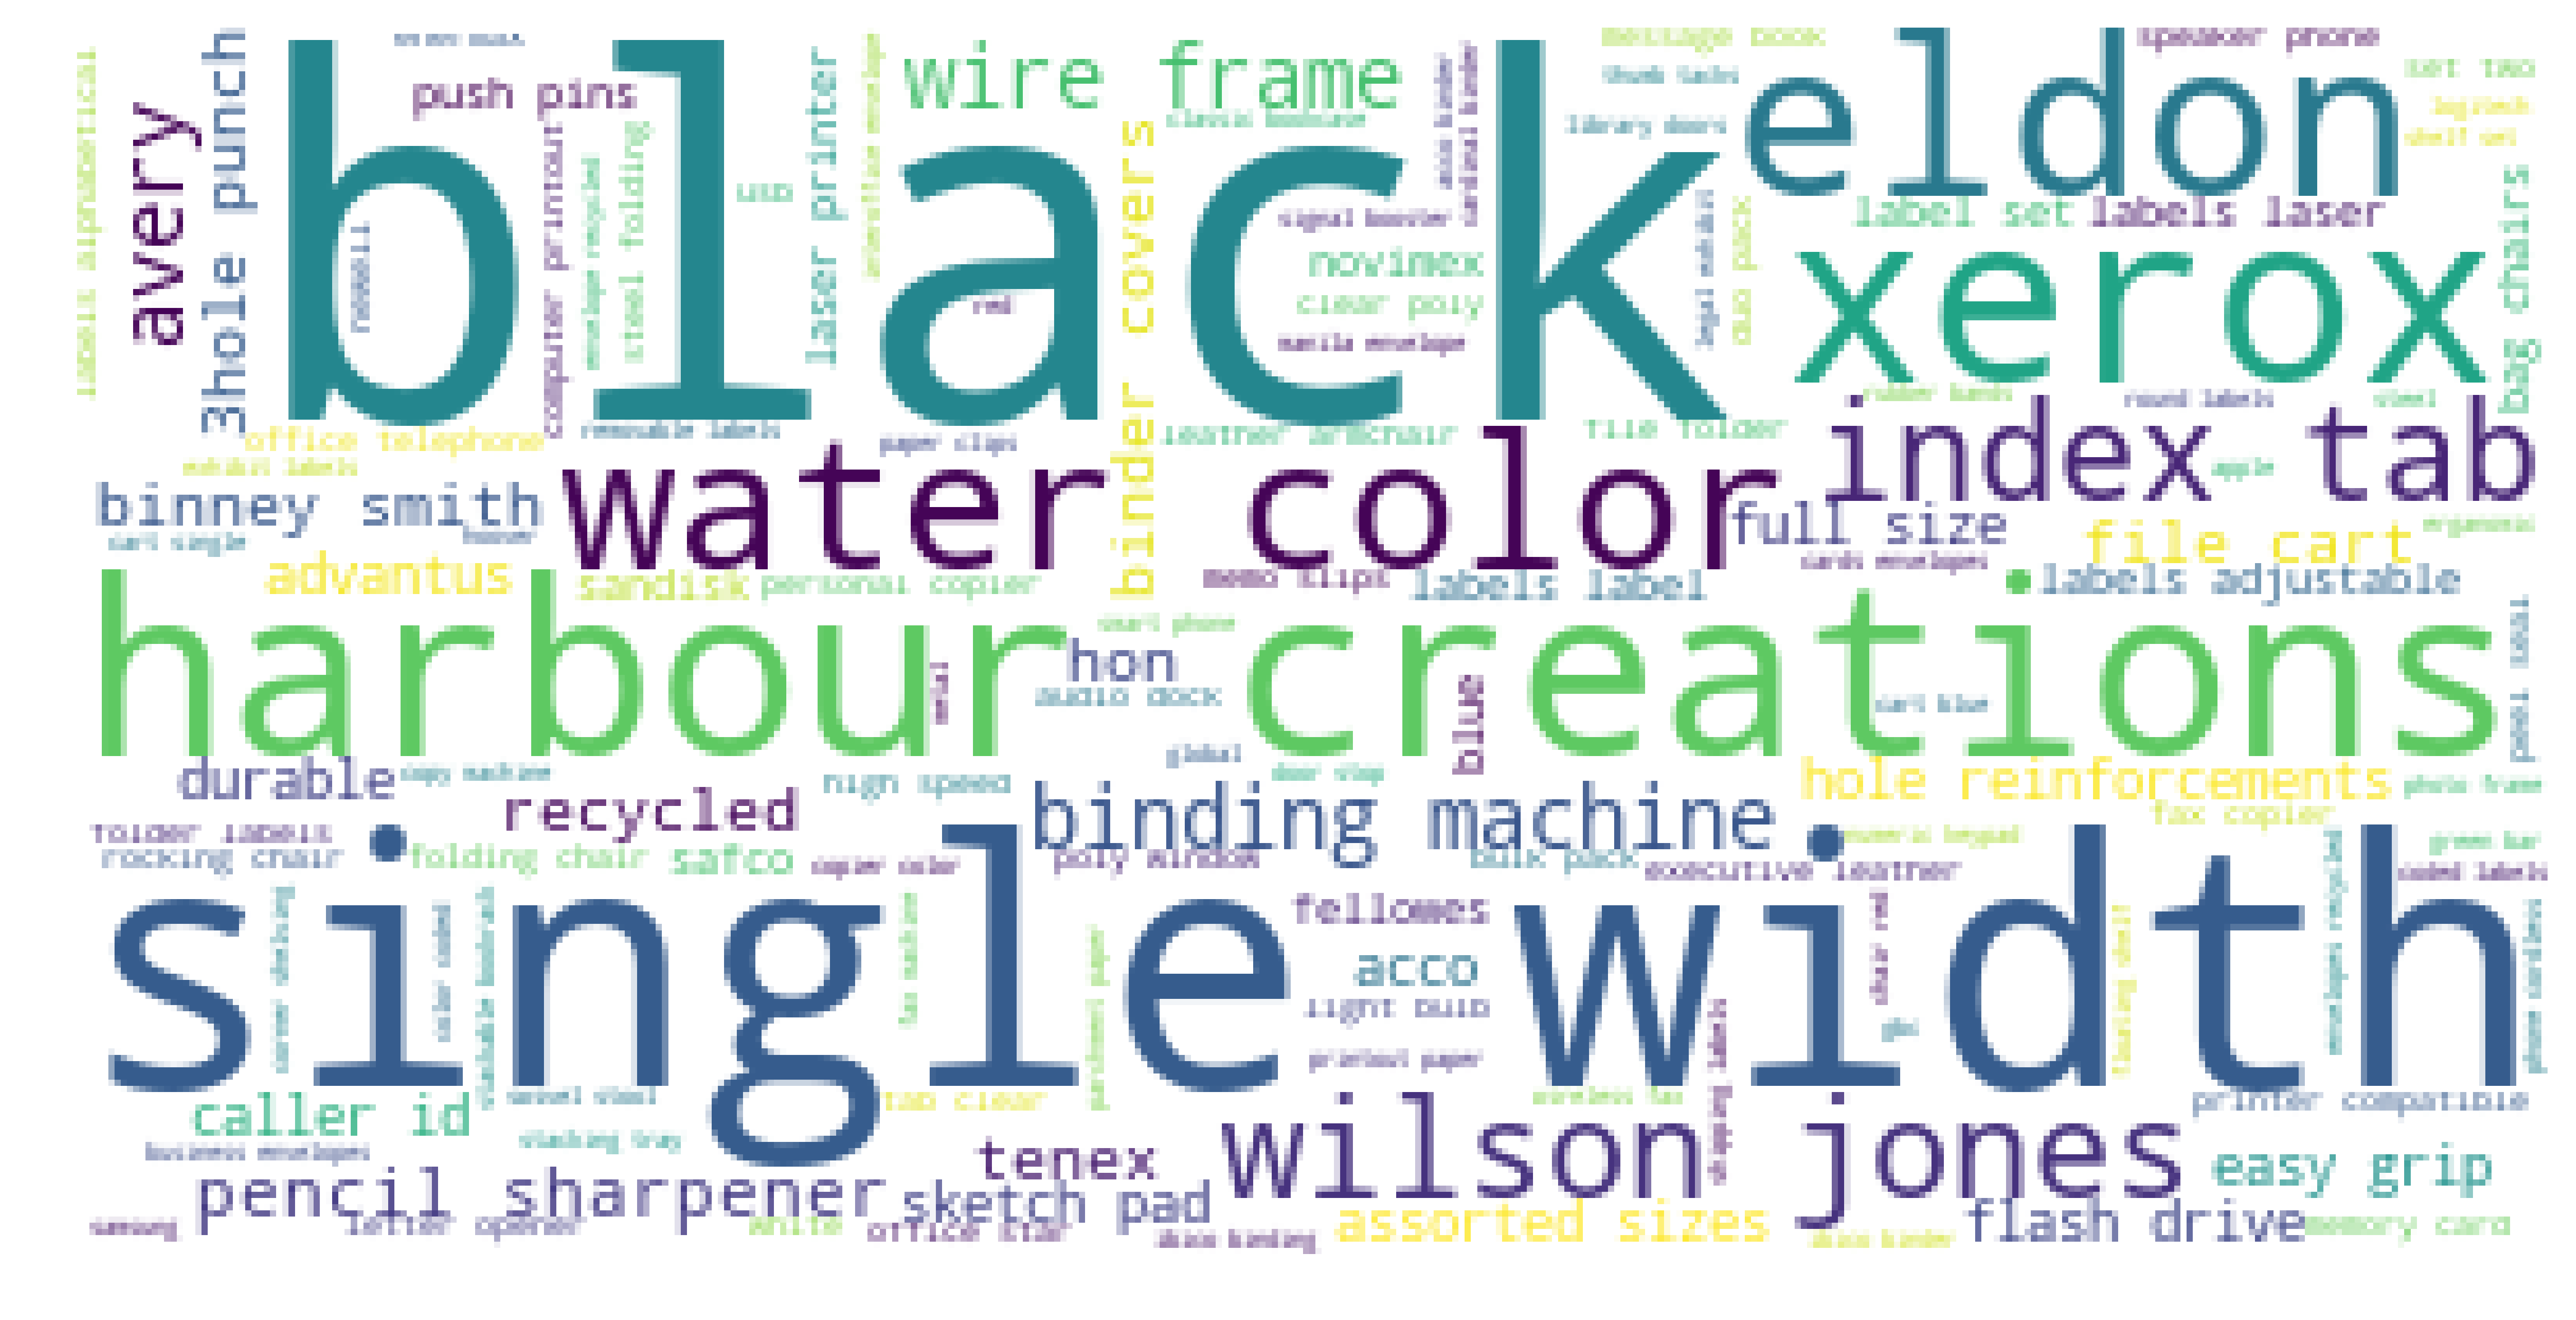

Month : 5


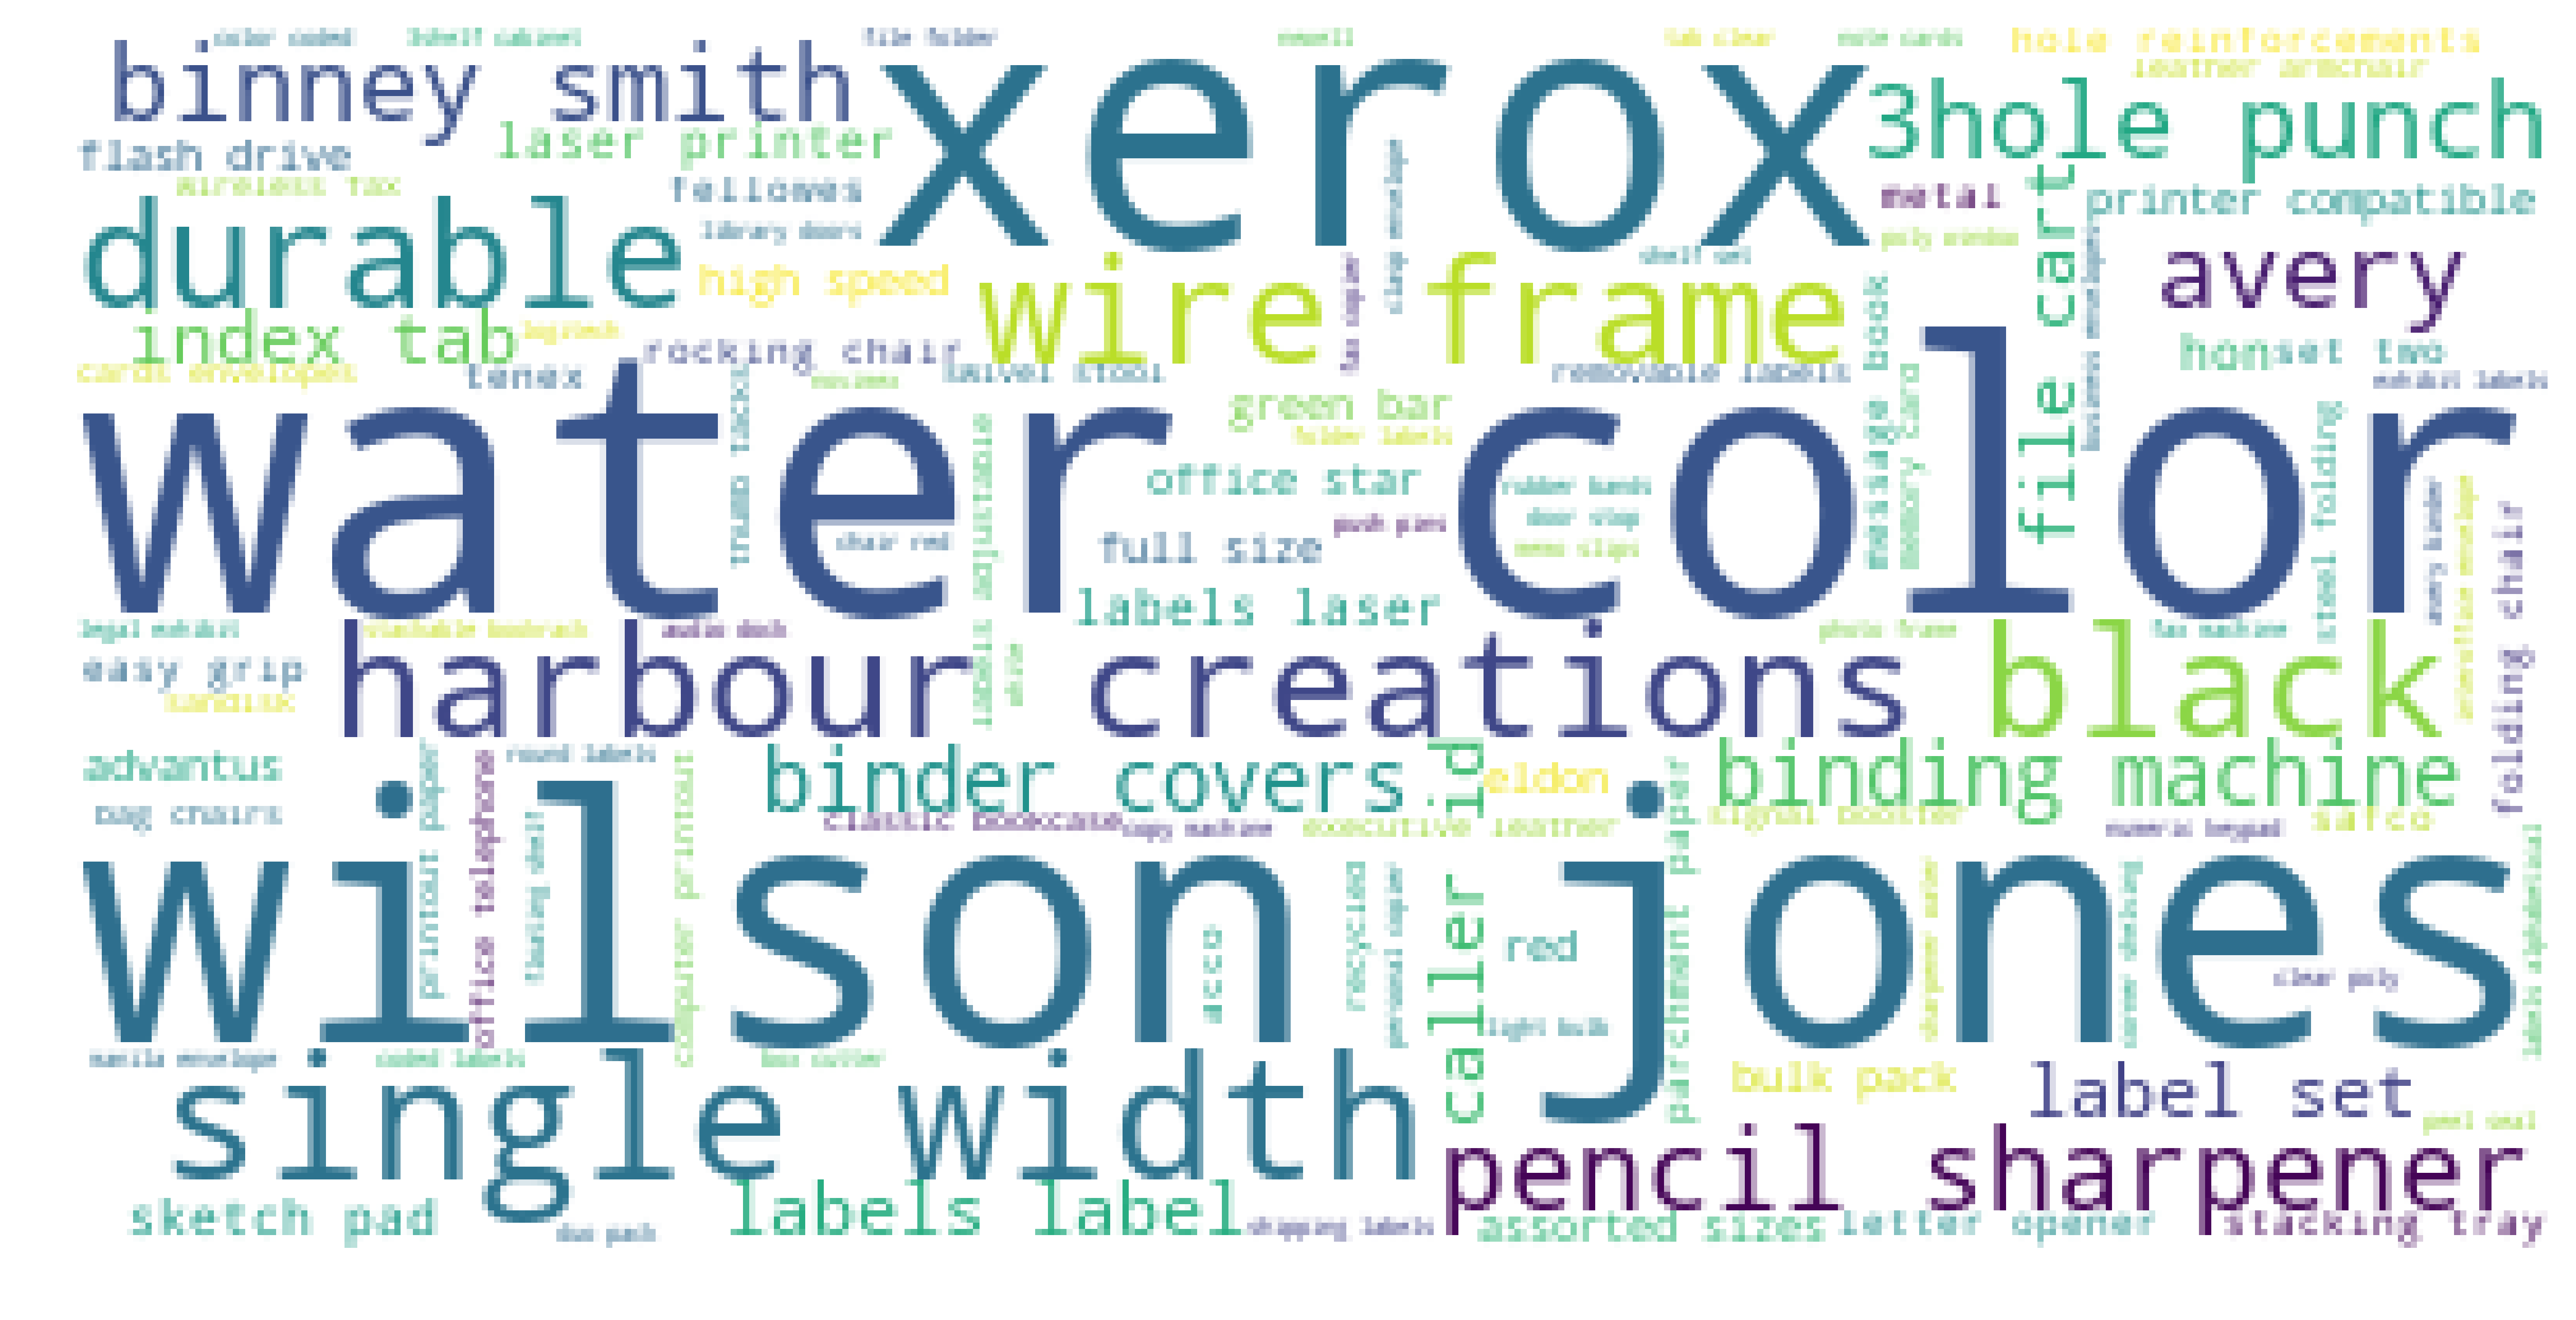

Month : 6


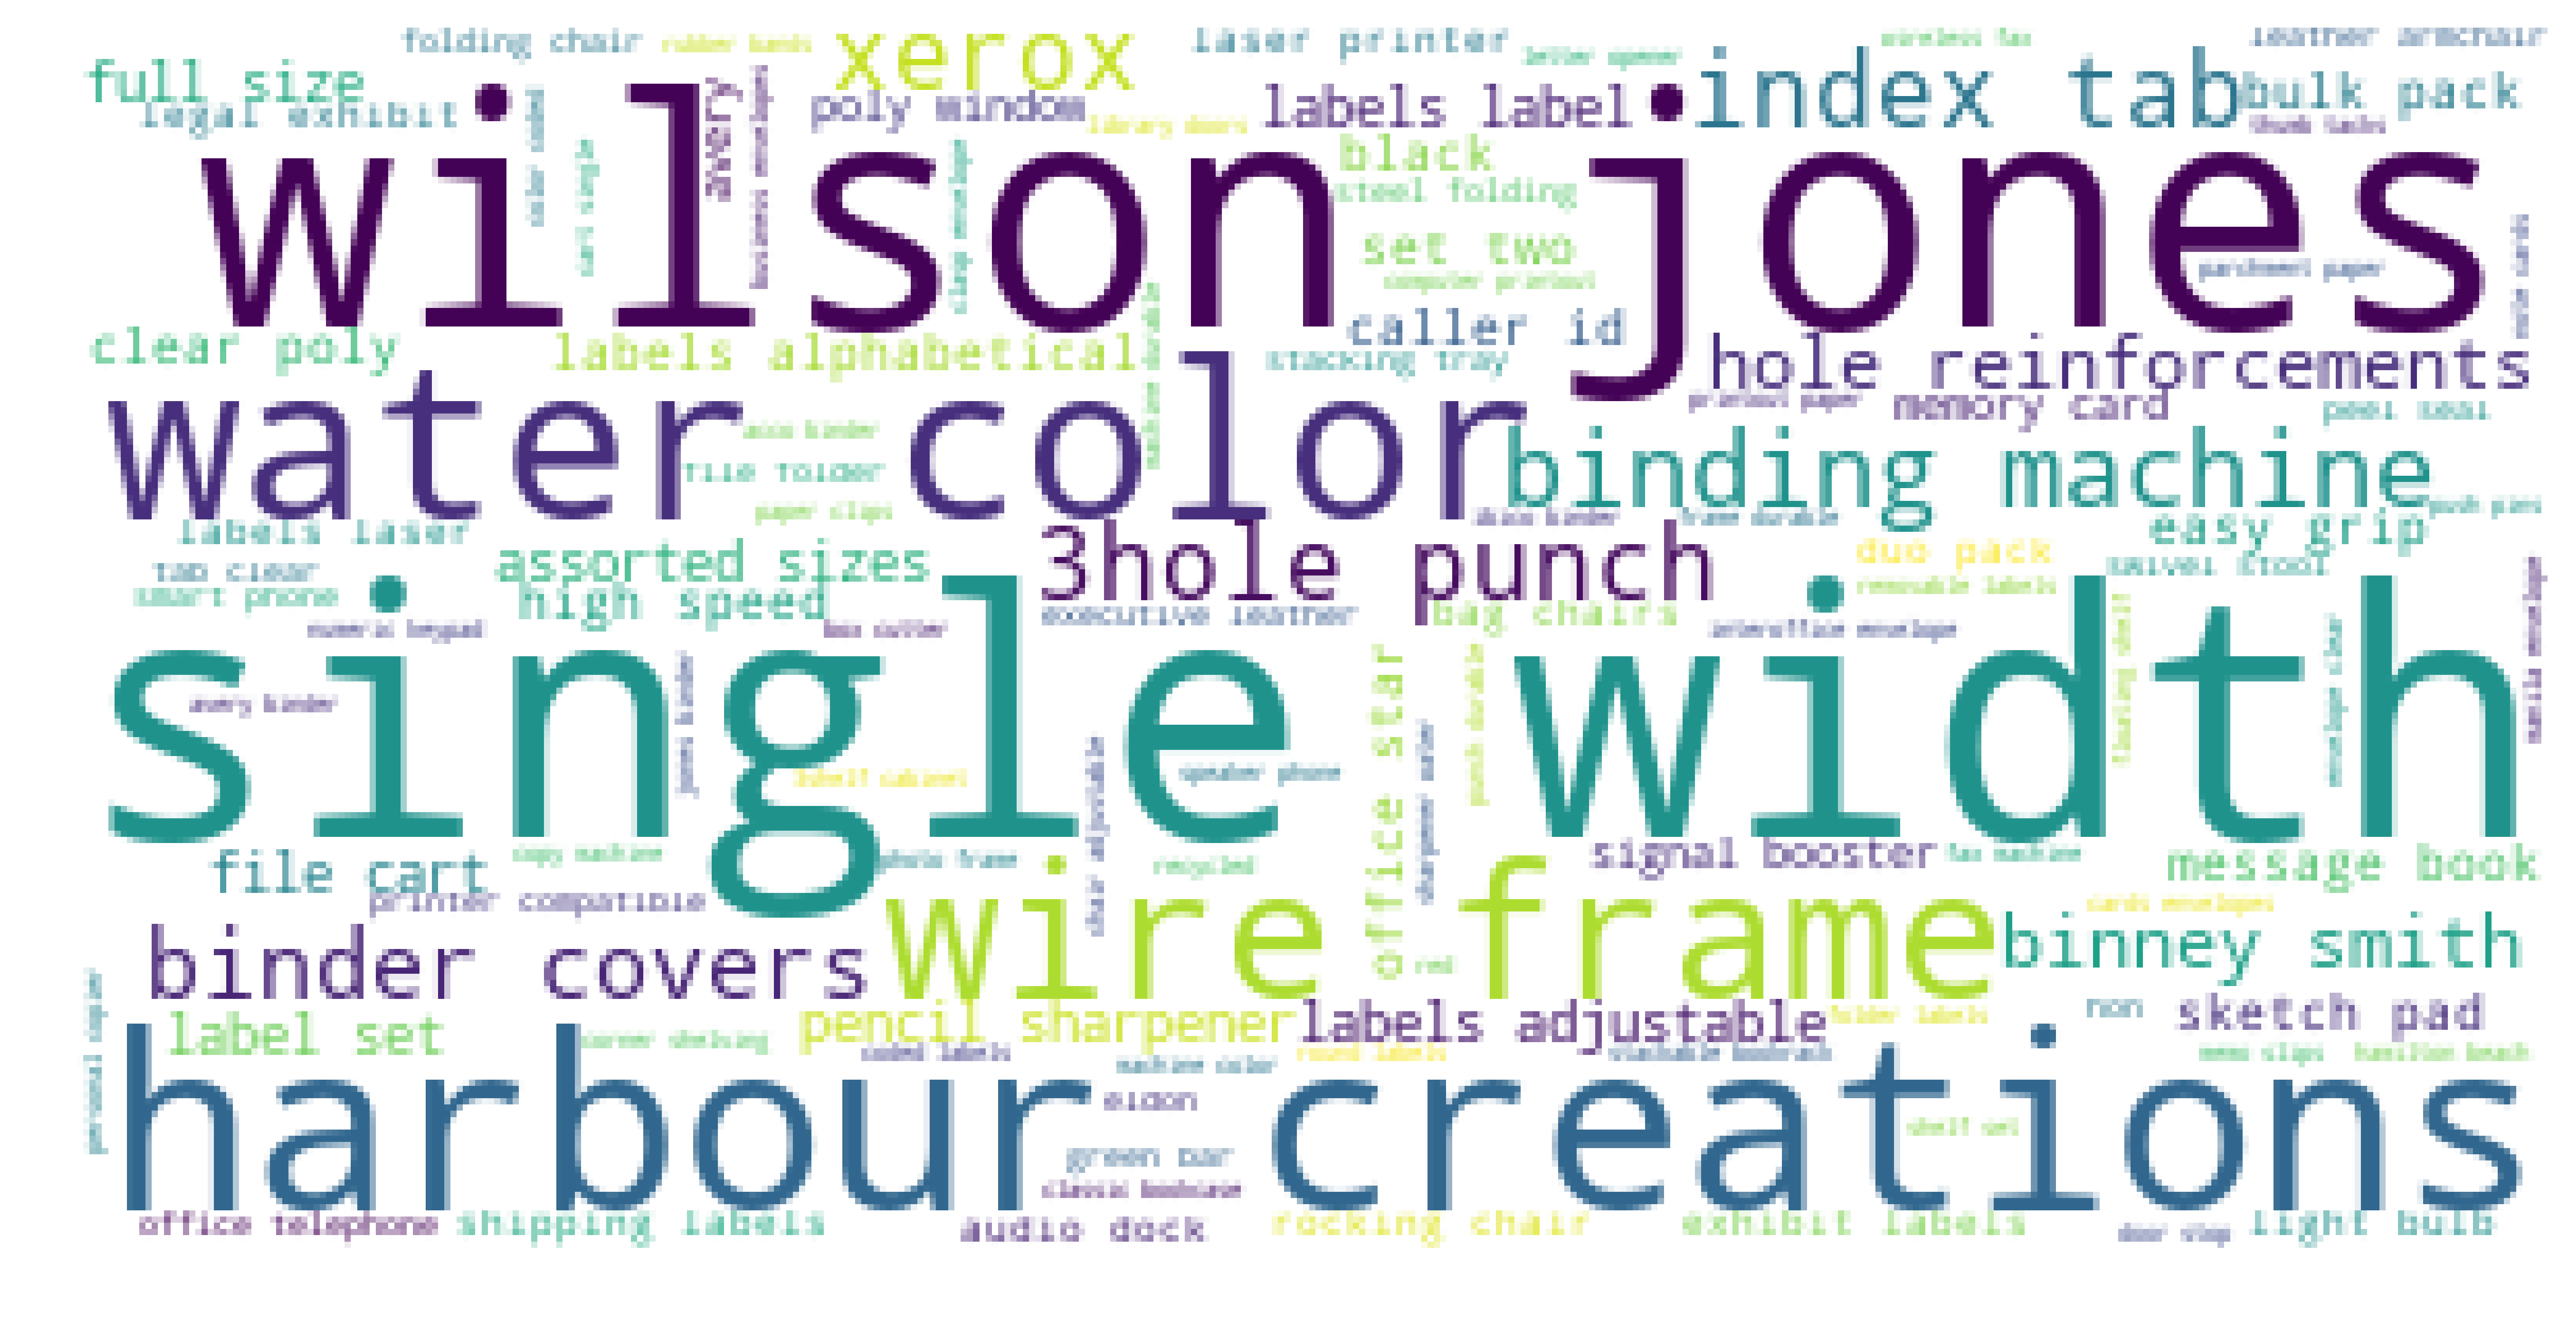

Month : 7


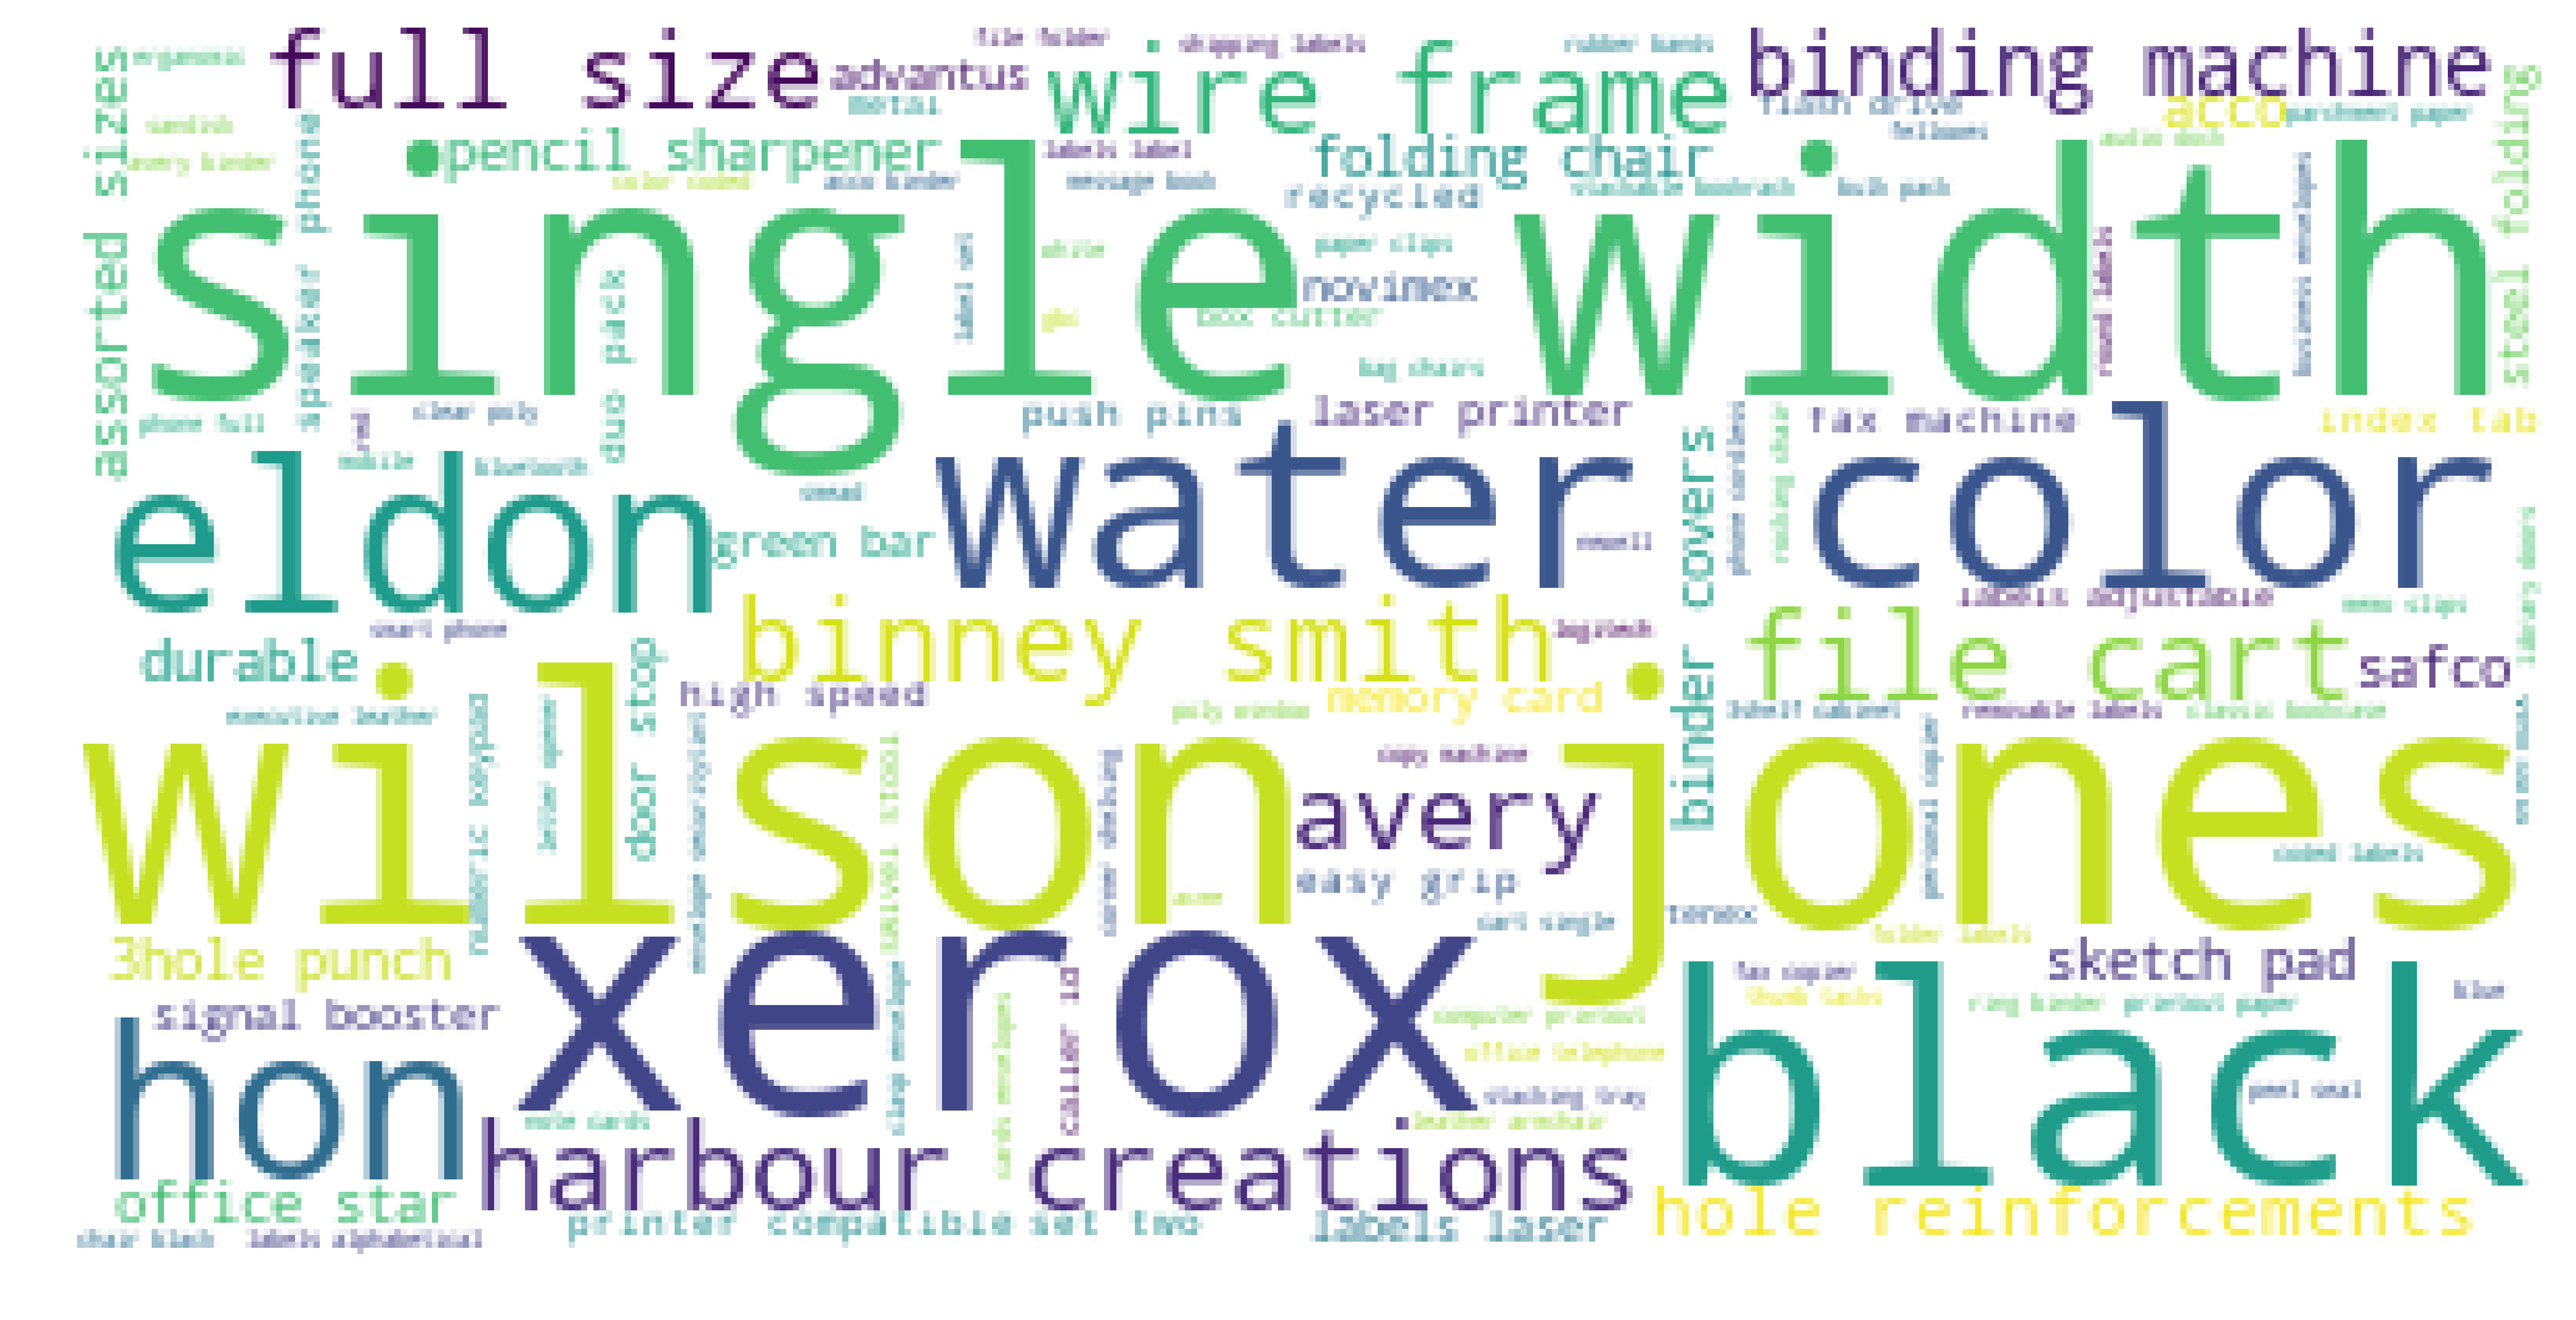

Month : 8


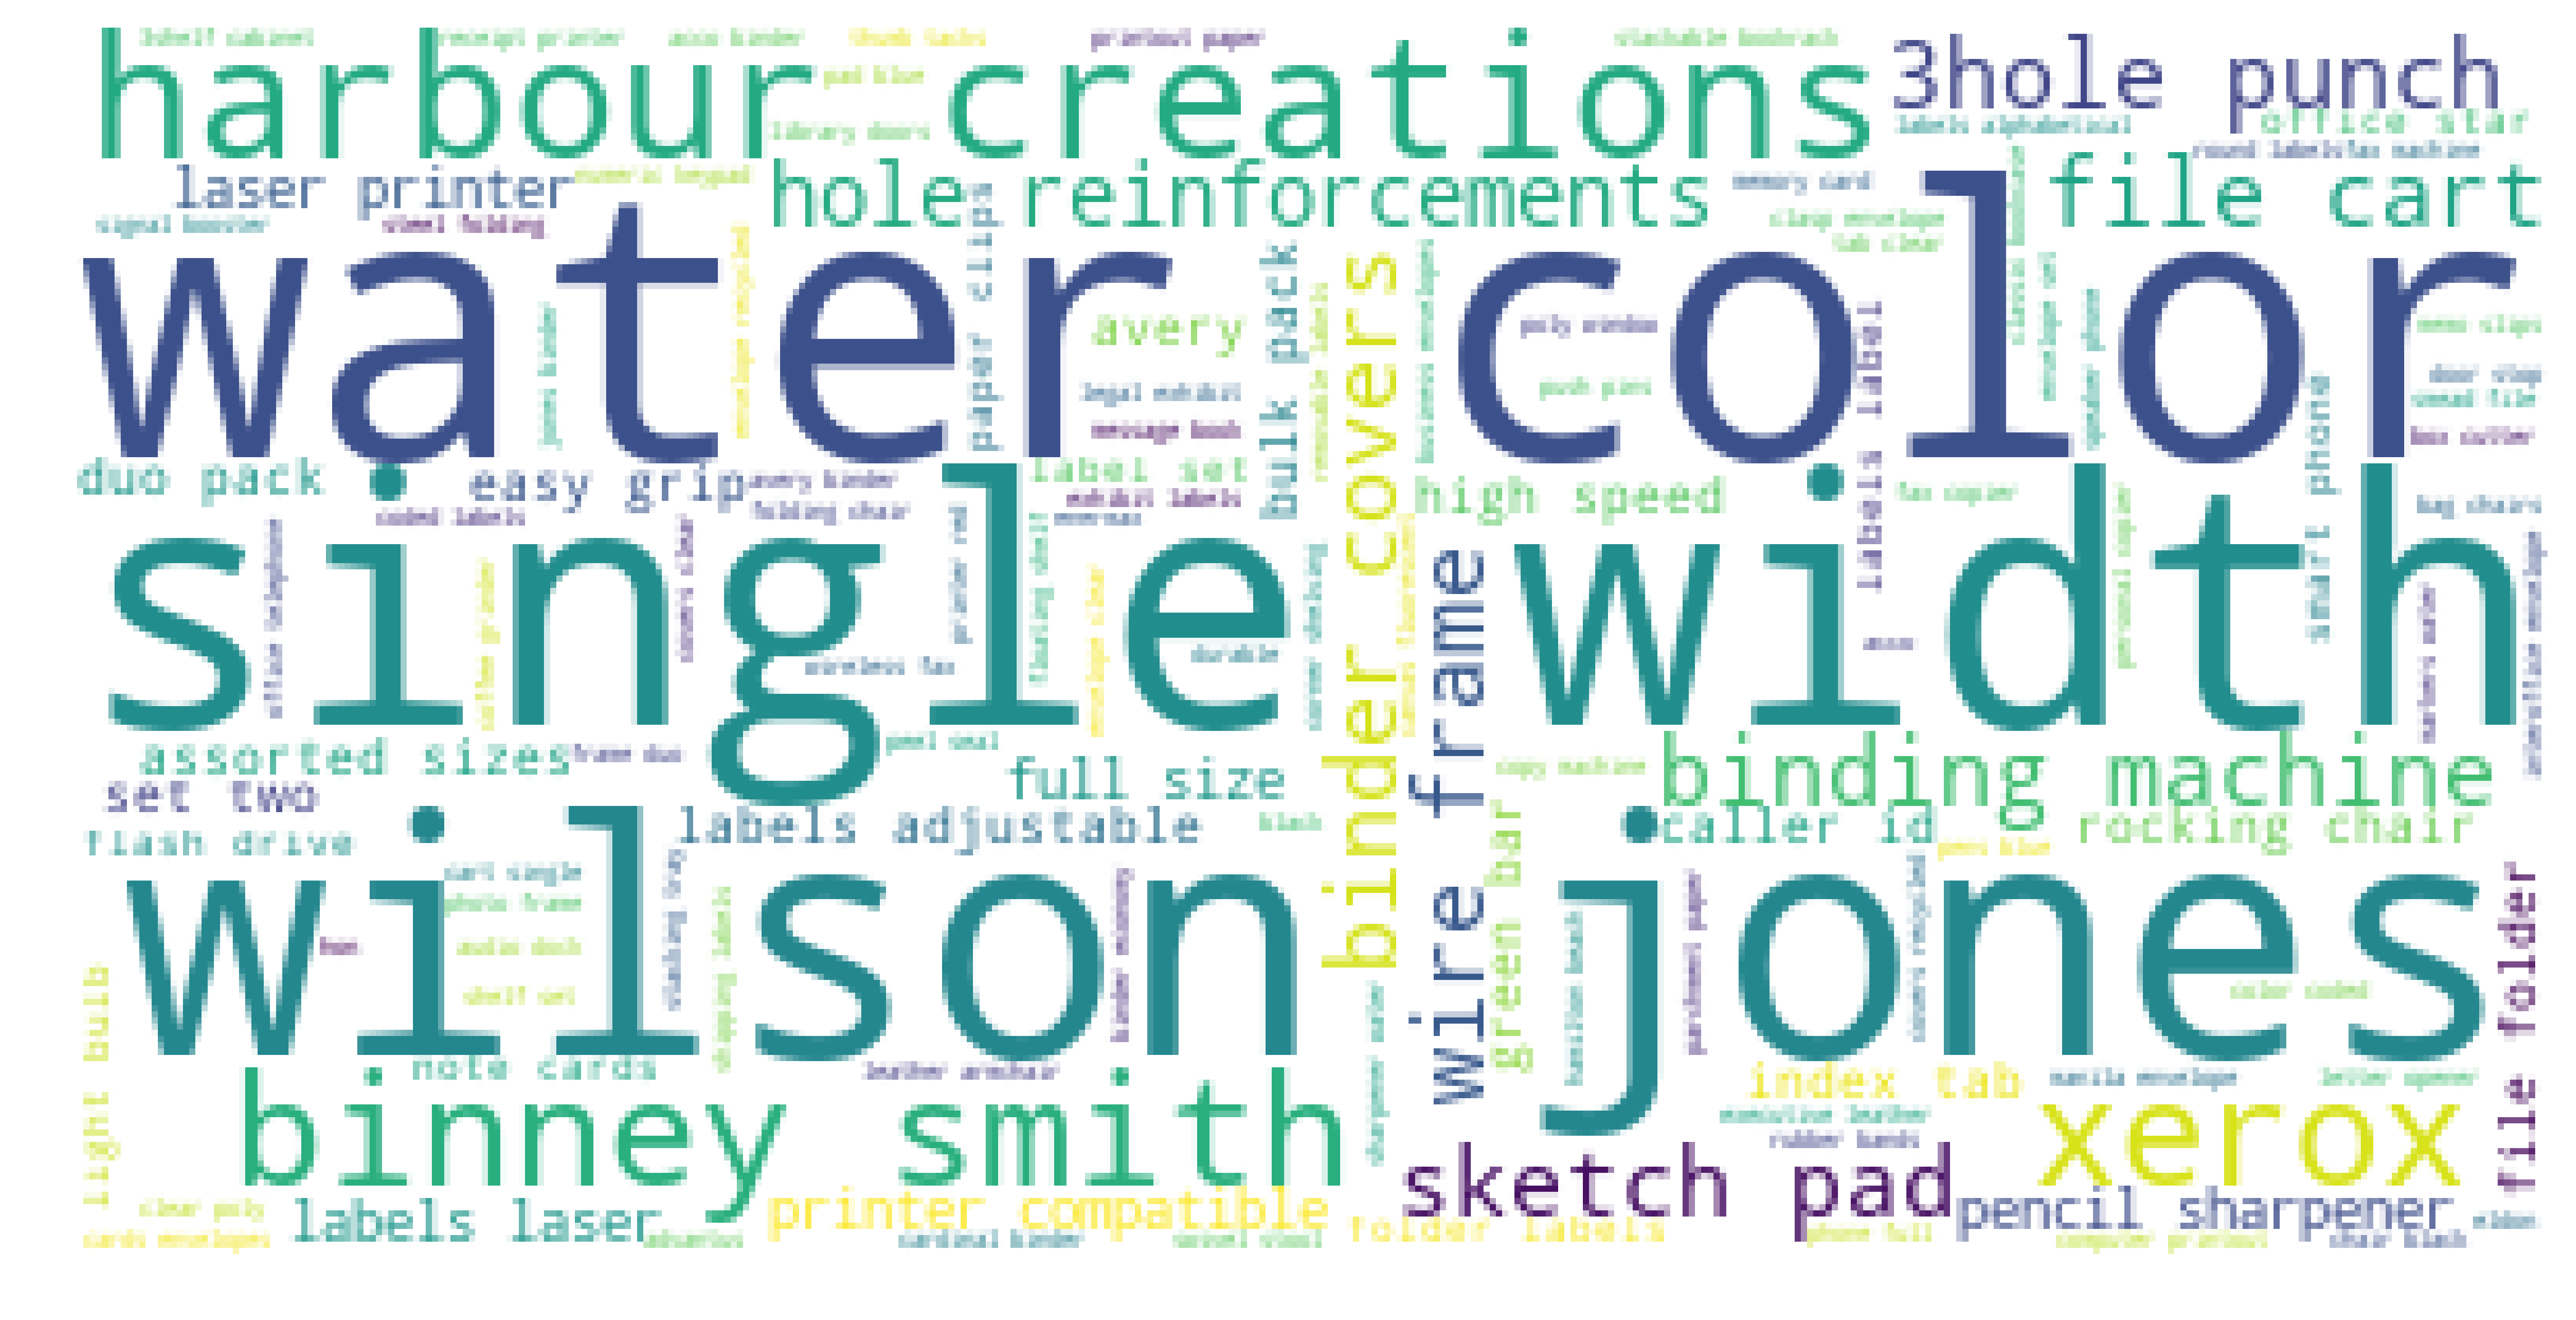

Month : 9


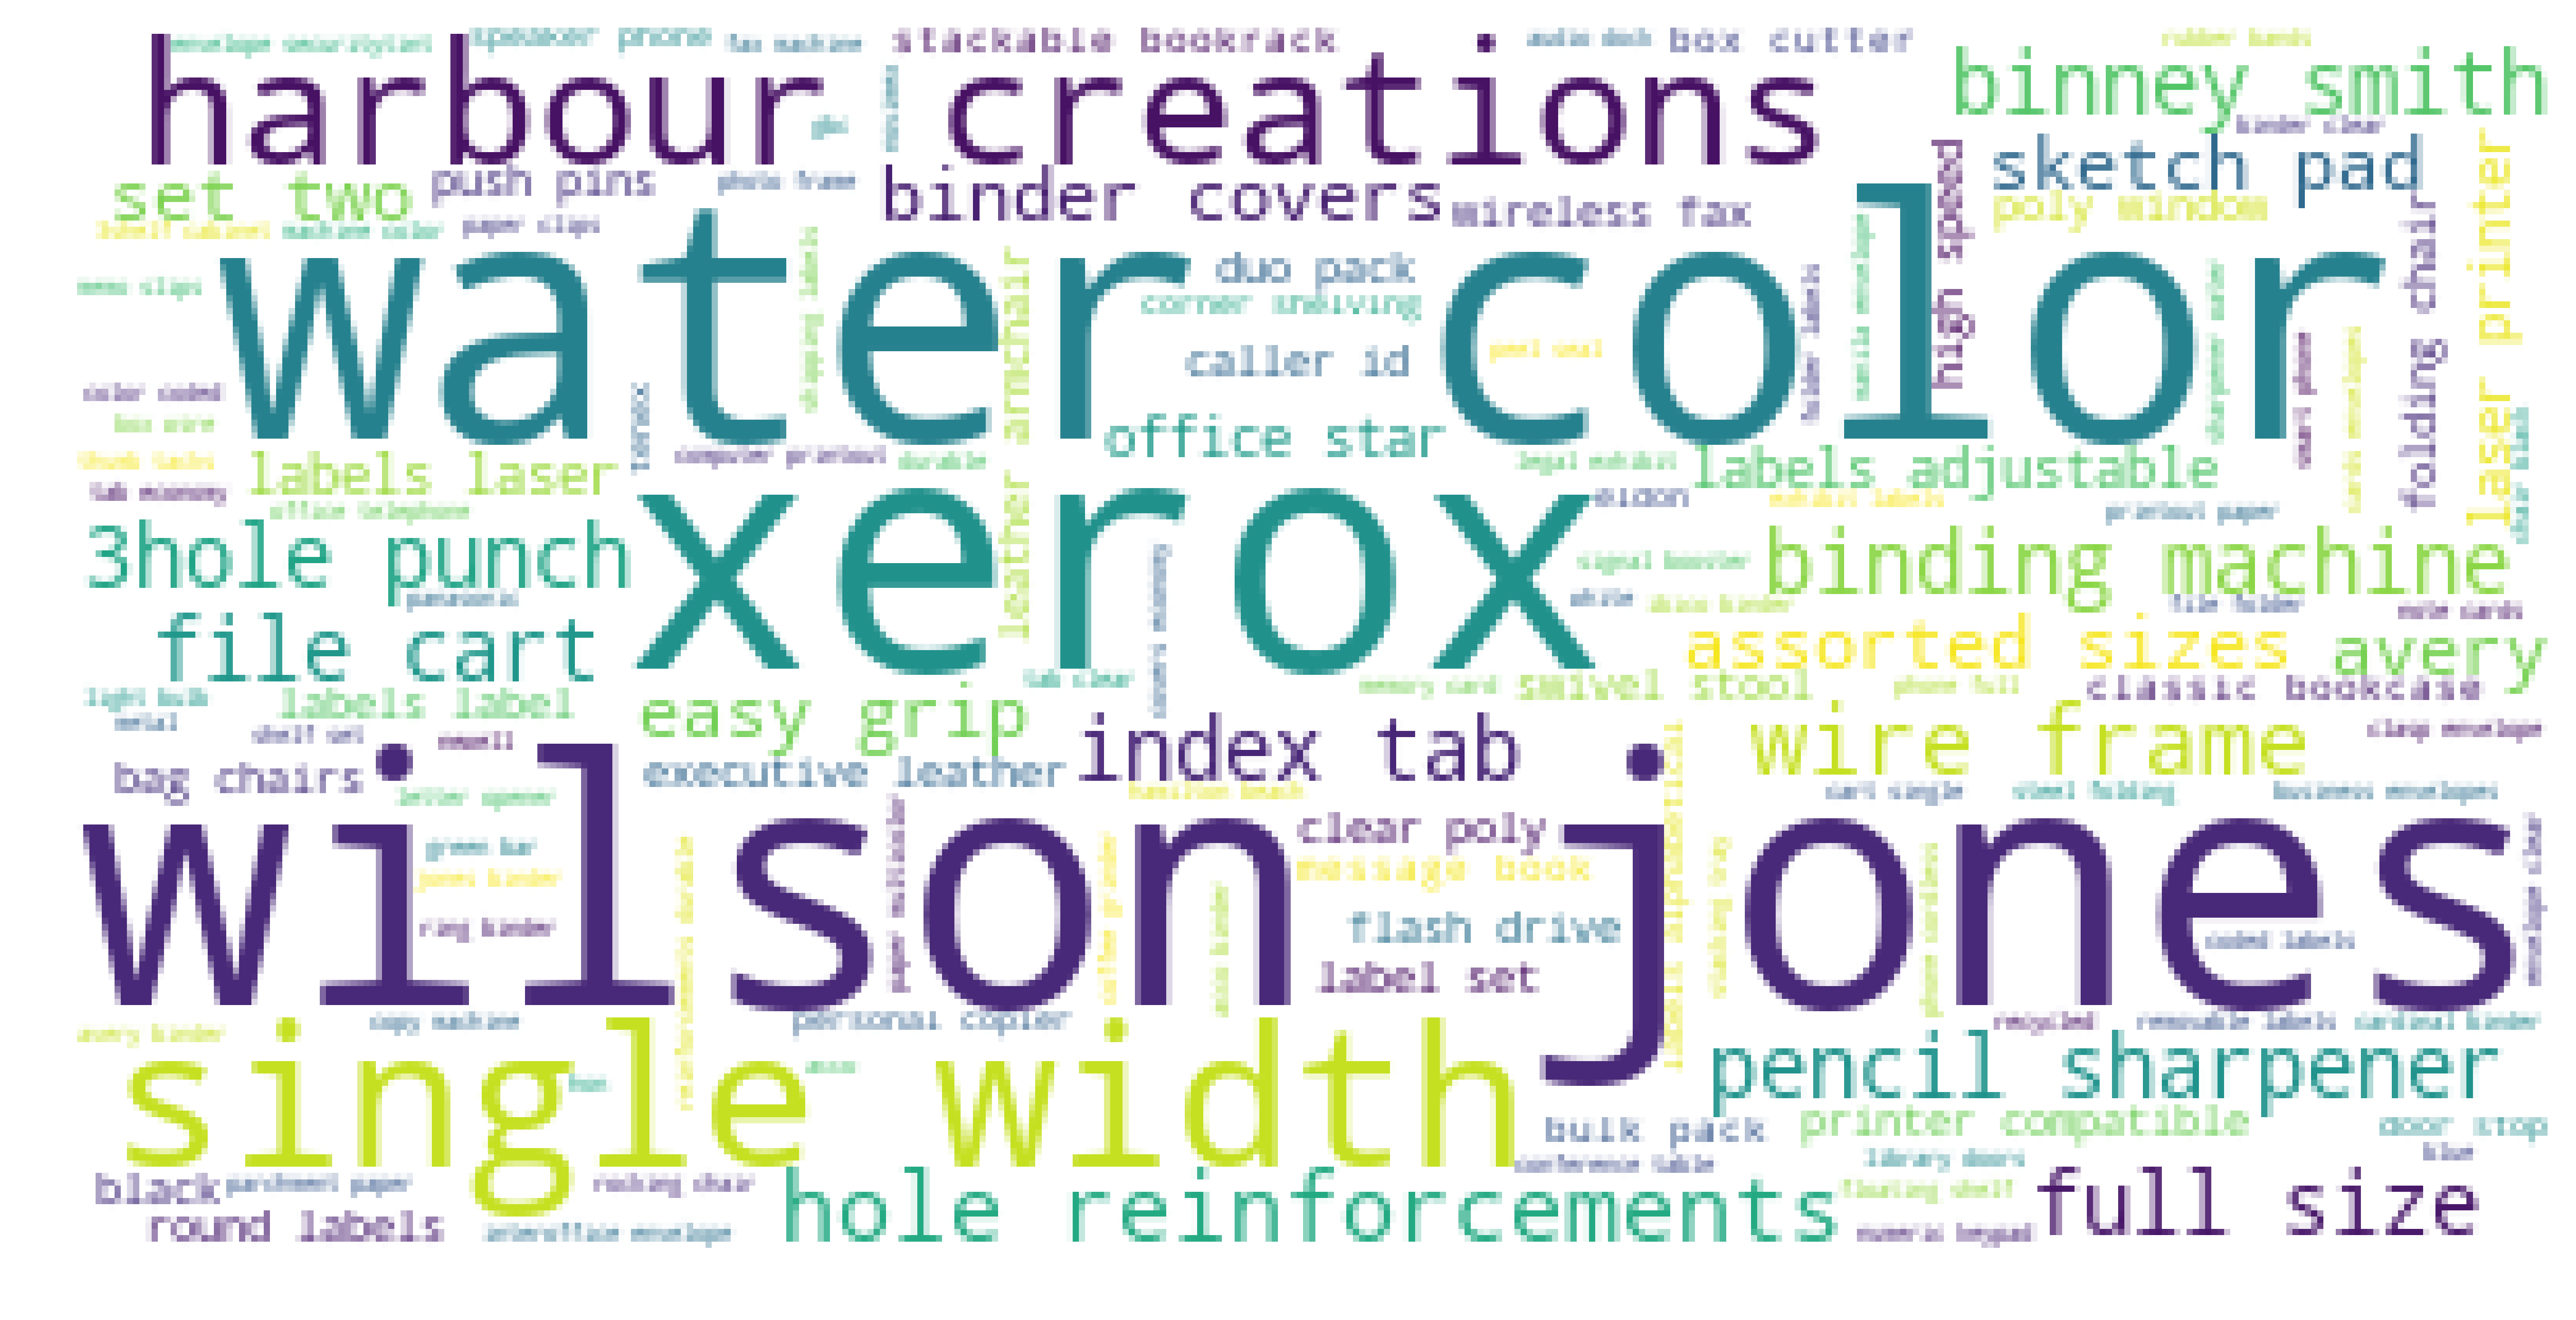

Month : 10


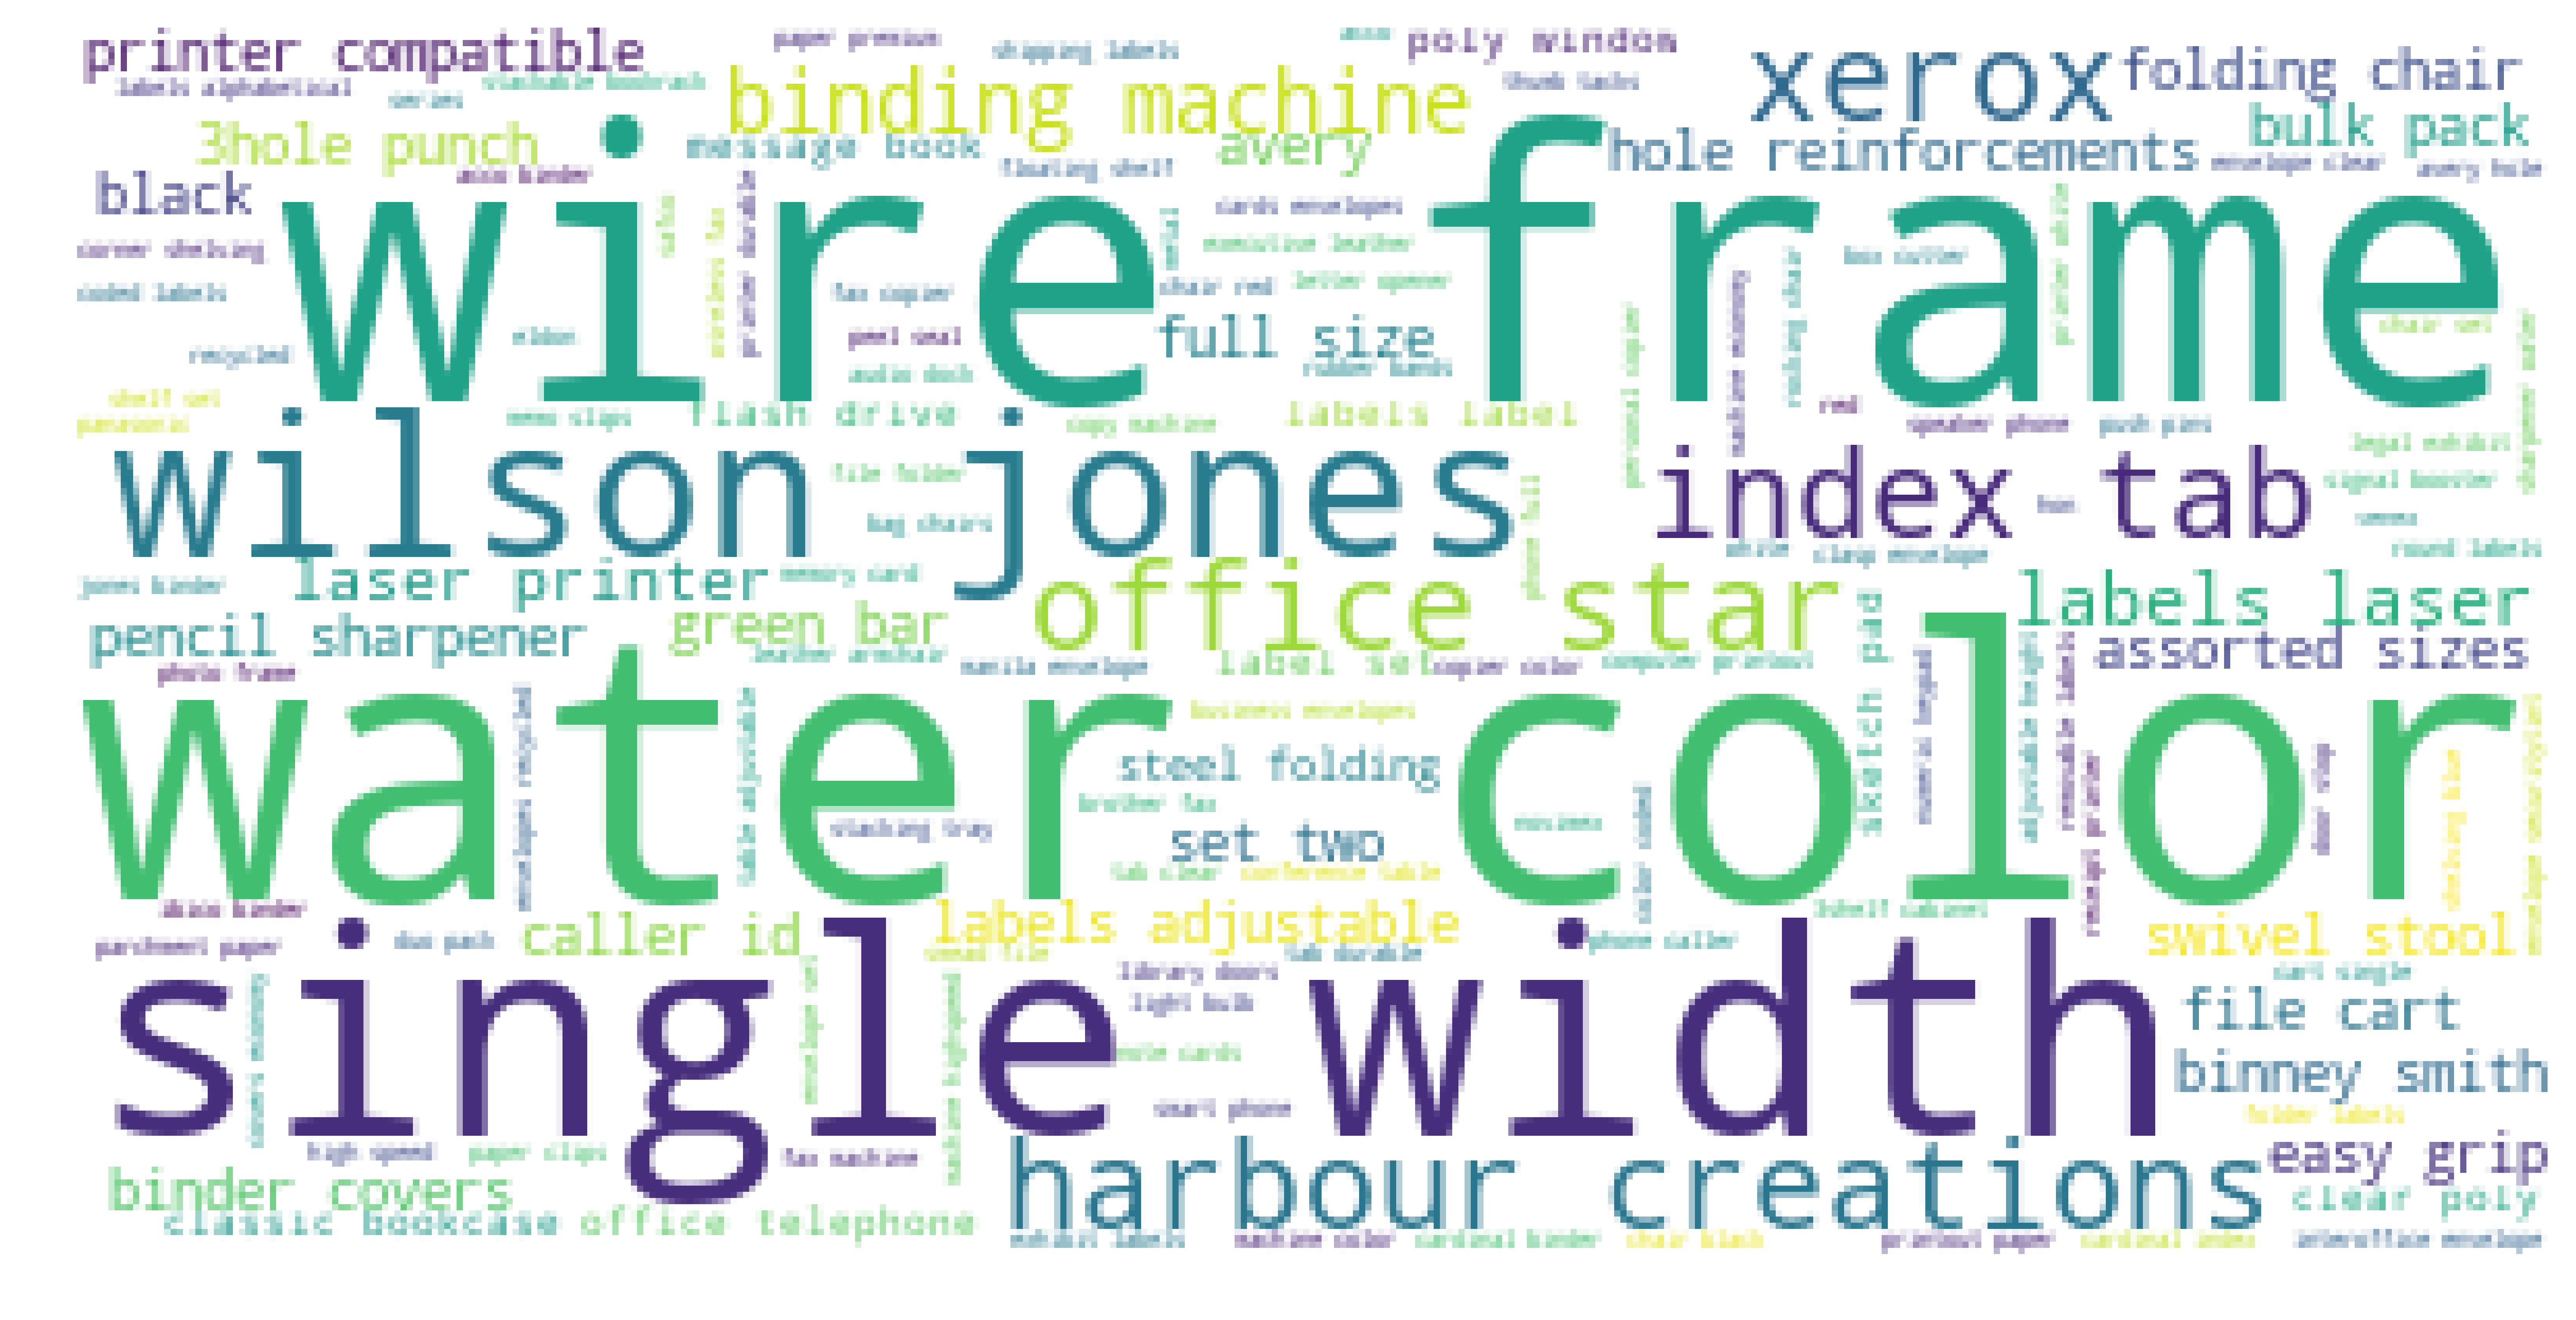

Month : 11


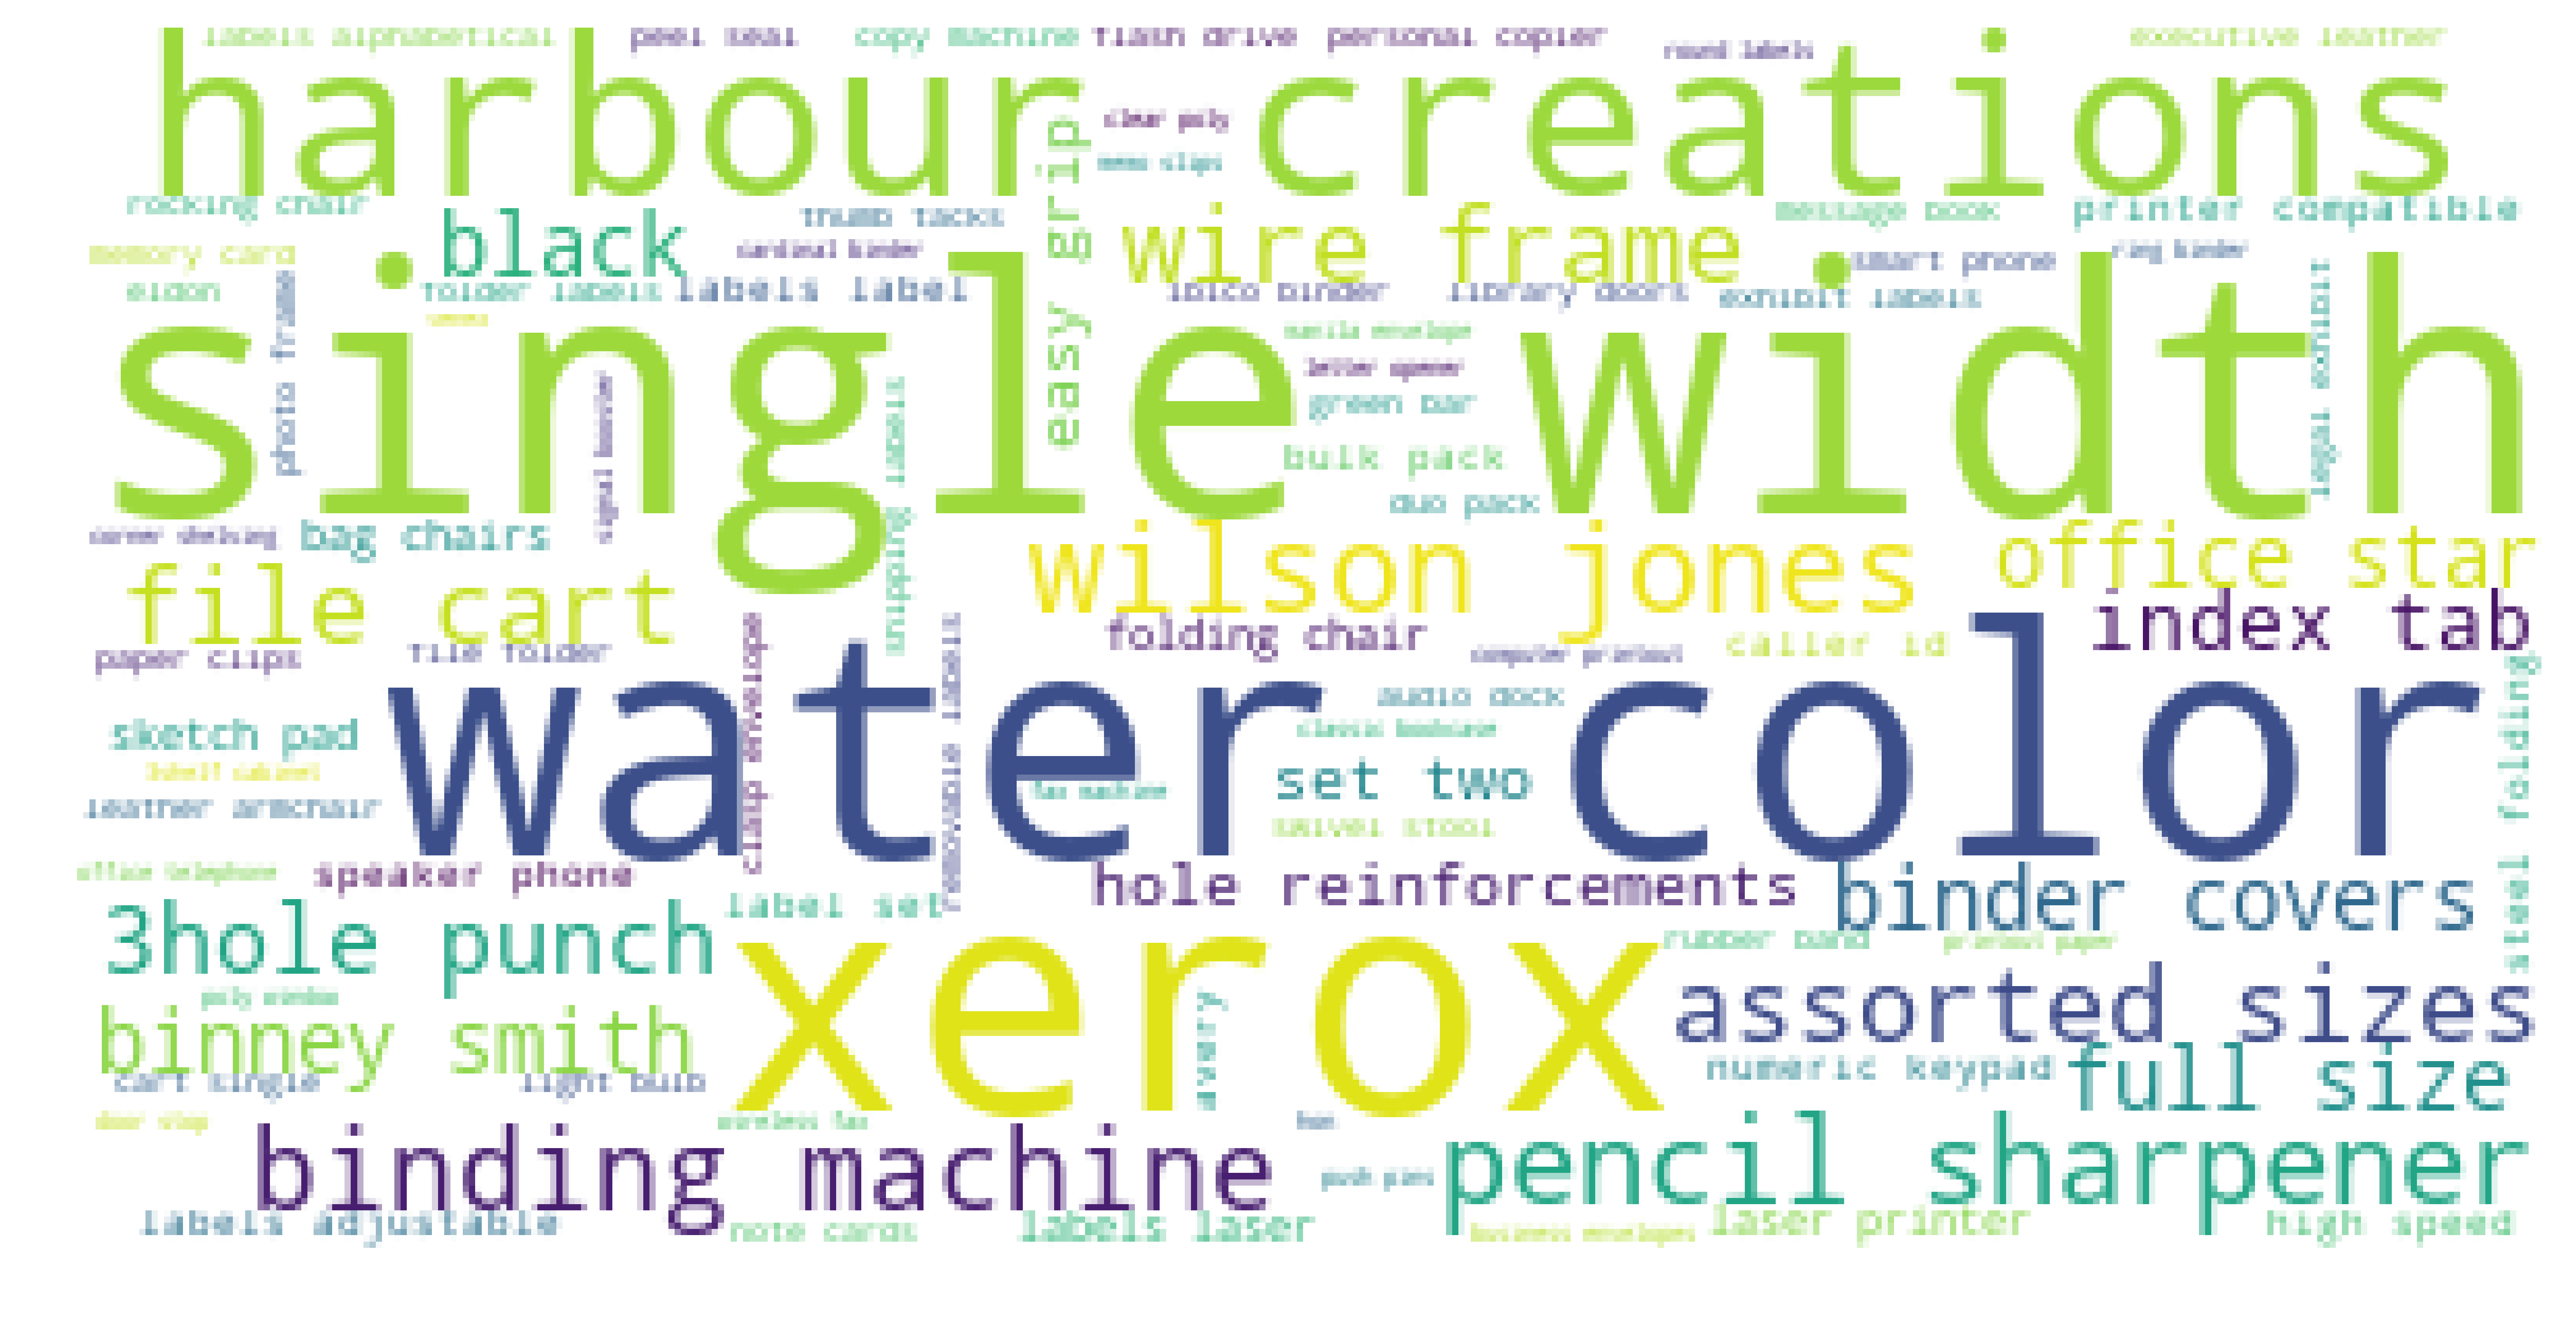

Month : 12


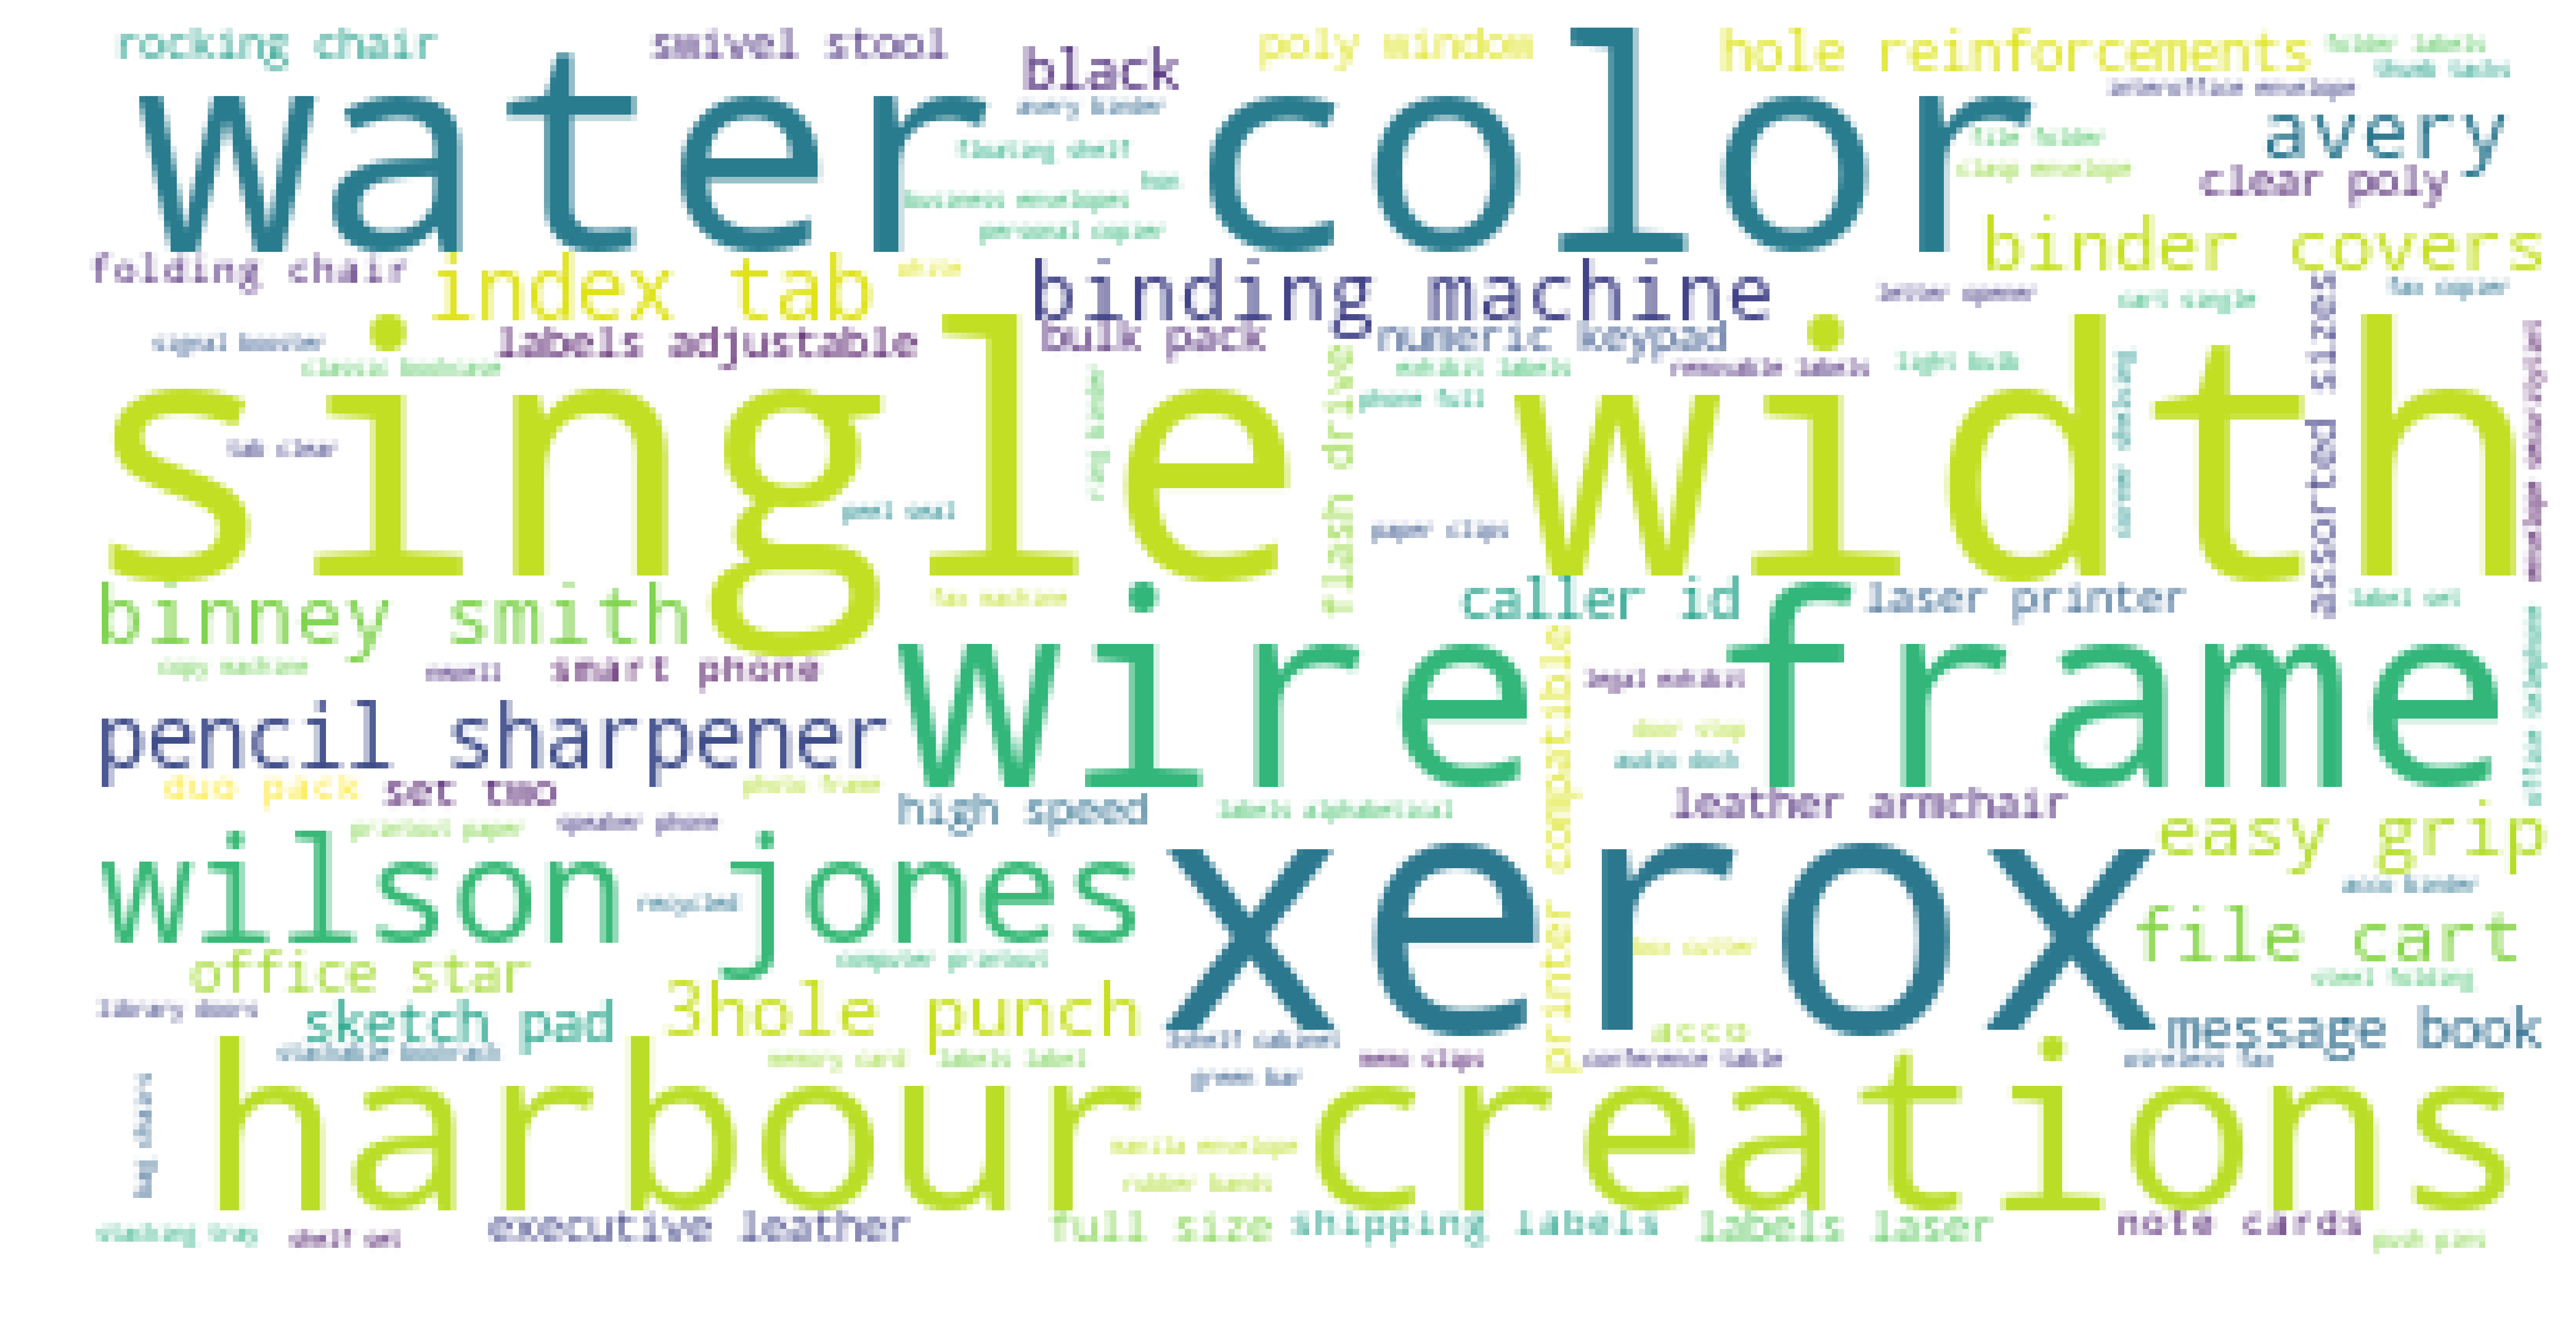

In [7]:
#Word Cloud from Product.Name by Order.Month
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

monthly_words = {}
for i in range(1,13):
    text_chunk = ' '.join(Orders[Orders['Order.Month'] == i]['Product.Name']).lower()
    text_chunk = re.sub('[:\',\-!;"()?”“’|=%\[\]/£+$><]',"", text_chunk)
    print('Month : ' + str(i))
    wordcloud = WordCloud(background_color="white",max_words=len(text_chunk),max_font_size=80, relative_scaling=.5).generate(text_chunk)
    plt.figure(figsize=(20,10), dpi = 400)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    text_tokens = nltk.word_tokenize(text_chunk)
    monthly_words['%s' % i] = text_tokens

In [8]:
#for i in range(1,13):
#    monthly_all = monthly_words[str(i)]
#    monthly_unique = np.unique(monthly_all)
#    count_result = list(map(lambda x: monthly_all.count(x), monthly_unique))
#    monthly_words_count_+'%s' % i = pd.DataFrame(monthyl_unique, count_result)

In [ ]:
1. How much profit did we lose due to returns each year?


2. How many customer returned more than once? more than 5 times?


3. Which regions are more likely to return orders?


4. Which categories (sub-categories) of products are more likely to be returned?

- ***Hint:*** Merge the **Returns** dataframe with the **Orders** dataframe using `Order.ID`.


## Part II: Machine Learning and Business Use Case

Now your manager has a basic understanding of why customers returned orders. Next, he wants you to use machine learning to predict which orders are most likely to be returned. In this part, you will generate several features based on our previous findings and your manager's requirements.

### Problem 4: Feature Engineering
#### Step 1: Create the dependent variable
- First of all, we need to generate a categorical variable which indicates whether an order has been returned or not.
- ***Hint:*** the returned orders’ IDs are contained in the dataset “returns”


#### Step 2:
- Your manager believes that **how long it took the order to ship** would affect whether the customer would return it or not. 
- He wants you to generate a feature which can measure how long it takes the company to process each order.
- ***Hint:*** Process.Time = Ship.Date - Order.Date


#### Step 3:

- If a product has been returned before, it may be returned again. 
- Let us generate a feature indictes how many times the product has been returned before.
- If it never got returned, we just impute using 0.
- ***Hint:*** Group by different Product.ID


### Problem 5: Fitting Models

- You can use any binary classification method you have learned so far.
- Use 80/20 training and test splits to build your model. 
- Double check the column types before you fit the model.
- Only include useful features. i.e all the `ID`s should be excluded from your training set.
- Not that there are only less than 5% of the orders have been returned, so you should consider using the `createDataPartition` function from `caret` package that does a **stratified** random split of the data. Scikit-learn also has a [StratifiedKfold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn-model-selection-stratifiedkfold) function that does similar thing.
- Do forget to `set.seed()` before the spilt to make your result reproducible.
- **Note:** We are not looking for the best tuned model in the lab so don't spend too much time on grid search. Focus on model evaluation and the business use case of each model.


### Problem 6: Evaluating Models
- What is the best metric to evaluate your model. Is accuracy good for this case?
- Now you have multiple models, which one would you pick? 
- Can you get any clue from the confusion matrix? What is the meaning of precision and recall in this case? Which one do you care the most? How will your model help the manager make decisions?
- **Note:** The last question is open-ended. Your answer could be completely different depending on your understanding of this business problem.

### Problem 7: Feature Engineering Revisit
- Is there anything wrong with the new feature we generated? How should we fix it?
- ***Hint***: For the real test set, we do not know it will get returned or not.